**PROJECT TEAM ID:** PTID-CDS-JAN-24-1768      
**PROJECT CODE :** PRCP-1020-HousePricePred    
**PROJECT NAME :** House Price Prediction - Advanced Regression


## Business case
We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

1.Which variables are significant in predicting the price of a house, and  
2.How well those variables describe the price of a house.  
In this assignment, we will

1.Use a hybrid combination of RFE for feature selection.  
2.Build a linear regression model with ridge and lasso regularization for predicting 'SalePrice', which is the final selling price of a property.  
3.Find optimal regularization parameters for each of the methods.    
4.Use R-squared score on the test set to evaluate our model.  
5.Decide which model to go with.        
Note that our main criterion of selecting a model would be R**2
 scores, especially on testing data. Further consideration will be given to Lasso if it successfully selects fewer variables in the model.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

In [2]:
df = pd.read_csv("data.csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

## Basic Checks

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
df.describe(include='O')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Insights : 
* From above data we can observe that there are null values.
* It is a regression data.


### Exploratory Data Analysis(EDA)
  * Exploratory Data Analysis (EDA) in machine learning involves examining and understanding the structure, patterns, and relationships within the dataset to inform feature selection, preprocessing, and model building.   
  * It typically includes tasks such as data cleaning, visualization, statistical analysis, and feature engineering to identify trends, outliers, and potential insights that can guide the model development process and improve predictive performance.  
  * EDA aims to gain actionable insights into the data and ensure that it is suitable for modeling, ultimately enhancing the effectiveness and interpretability of machine learning models.  

#### Data Cleaning

#### 1. Dropping unnecessary columns

In [10]:
# ID is not necessary for regression
df = df.drop(['Id'],axis=1)

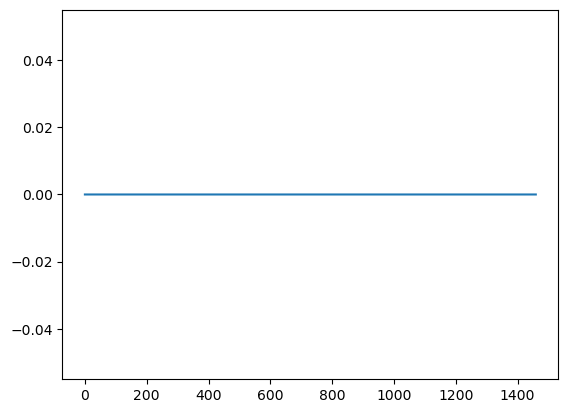

In [11]:
plt.plot(df.TotalBsmtSF - df.BsmtFinSF1-df.BsmtFinSF2-df.BsmtUnfSF)

In [12]:
# So we can drop TotalBsmtSF
df = df.drop(['TotalBsmtSF'],axis=1)

Alley, PoolQC and MiscFeature have very few non-null values, so let's drop them


In [13]:
# So we can drop TotalBsmtSF
df = df.drop(['Alley', 'PoolQC', 'MiscFeature'],axis=1)

#### 2. Dealing with the nulls

In [14]:
for i in df[df.columns[df.isnull().any()]].columns:
    print('- ',i)

-  LotFrontage
-  MasVnrType
-  MasVnrArea
-  BsmtQual
-  BsmtCond
-  BsmtExposure
-  BsmtFinType1
-  BsmtFinType2
-  Electrical
-  FireplaceQu
-  GarageType
-  GarageYrBlt
-  GarageFinish
-  GarageQual
-  GarageCond
-  Fence


Here's how we could deal with the nulls:

LotFrontage : NA means no information. We need to either replace null with some representative number or remove rows.    
MasVnrType: NA means No masonry: Replace NA with new category.  
MasVnrArea: NA means No masonry: Replace NA with 0.  
BsmtQual: NA means No basement: Replace NA with new category.  
BsmtCond: NA means No basement: Replace NA with new category.  
BsmtExposure: NA means No basement: Replace NA with new category  
BsmtFinType1: NA means No basement: Replace NA with new category  
BsmtFinType2: NA means No basement: Replace NA with new category  
Electrical: NA means no information. We need to either replace null with some representative number or remove rows  
FireplaceQu: NA means No fireplace: Replace NA with new category  
GarageType: NA means No garage: Replace NA with new category  
GarageYrBlt: NA means No garage: Replace NA with some new number  
GarageFinish: NA means No garage: Replace NA with new category  
GarageQual: NA means No garage: Replace NA with new category  
GarageCond: NA means No garage: Replace NA with new category  
Fence: NA means No fence: Replace NA with new category  

In [15]:
df.MasVnrType.fillna('NA',inplace=True)
df.MasVnrArea.fillna(0,inplace=True)
df.BsmtQual.fillna('NA',inplace=True)
df.BsmtCond.fillna('NA',inplace=True)
df.BsmtExposure.fillna('NA',inplace=True)
df.BsmtFinType1.fillna('NA',inplace=True)
df.BsmtFinType2.fillna('NA',inplace=True)
df.FireplaceQu.fillna('NA',inplace=True)
df.GarageType.fillna('NA',inplace=True)
df.GarageFinish.fillna('NA',inplace=True)
df.GarageQual.fillna('NA',inplace=True)
df.GarageCond.fillna('NA',inplace=True)
df.Fence.fillna('NA',inplace=True)

In [16]:
# Since it is just one rowm Let's drop the null rows for Electrical
df.dropna(subset=['Electrical'],inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1200 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

Now let's get back to the problem of filling Nulls We have GarageYrBlt. Sensibly, this could be correlated, or even replaced by YearBuilt.   
Let us check this out

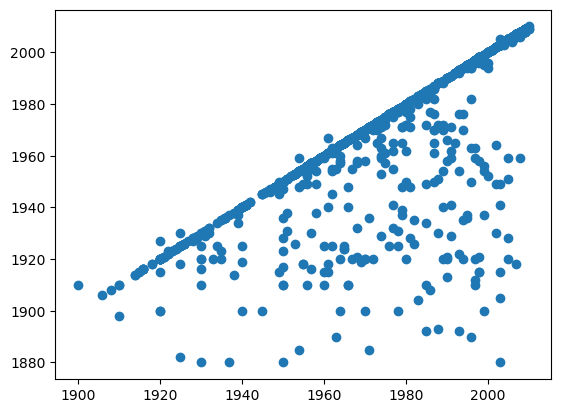

In [18]:
plt.scatter(df.GarageYrBlt,df. YearBuilt)

In [19]:
df[['GarageYrBlt','YearBuilt']].corr()

GarageYrBlt  YearBuilt
GarageYrBlt     1.000000   0.825503
YearBuilt       0.825503   1.000000

Due to such strong linearity, we can simply remove GarageYrBlt

In [20]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [21]:
#Let's just remove all the null rows in LotFrontage
df.dropna(subset=['LotFrontage'],inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1200 non-null   int64  
 1   MSZoning       1200 non-null   object 
 2   LotFrontage    1200 non-null   float64
 3   LotArea        1200 non-null   int64  
 4   Street         1200 non-null   object 
 5   LotShape       1200 non-null   object 
 6   LandContour    1200 non-null   object 
 7   Utilities      1200 non-null   object 
 8   LotConfig      1200 non-null   object 
 9   LandSlope      1200 non-null   object 
 10  Neighborhood   1200 non-null   object 
 11  Condition1     1200 non-null   object 
 12  Condition2     1200 non-null   object 
 13  BldgType       1200 non-null   object 
 14  HouseStyle     1200 non-null   object 
 15  OverallQual    1200 non-null   int64  
 16  OverallCond    1200 non-null   int64  
 17  YearBuilt      1200 non-null   int64  
 18  YearRemo

#### 3. Outlier Removal

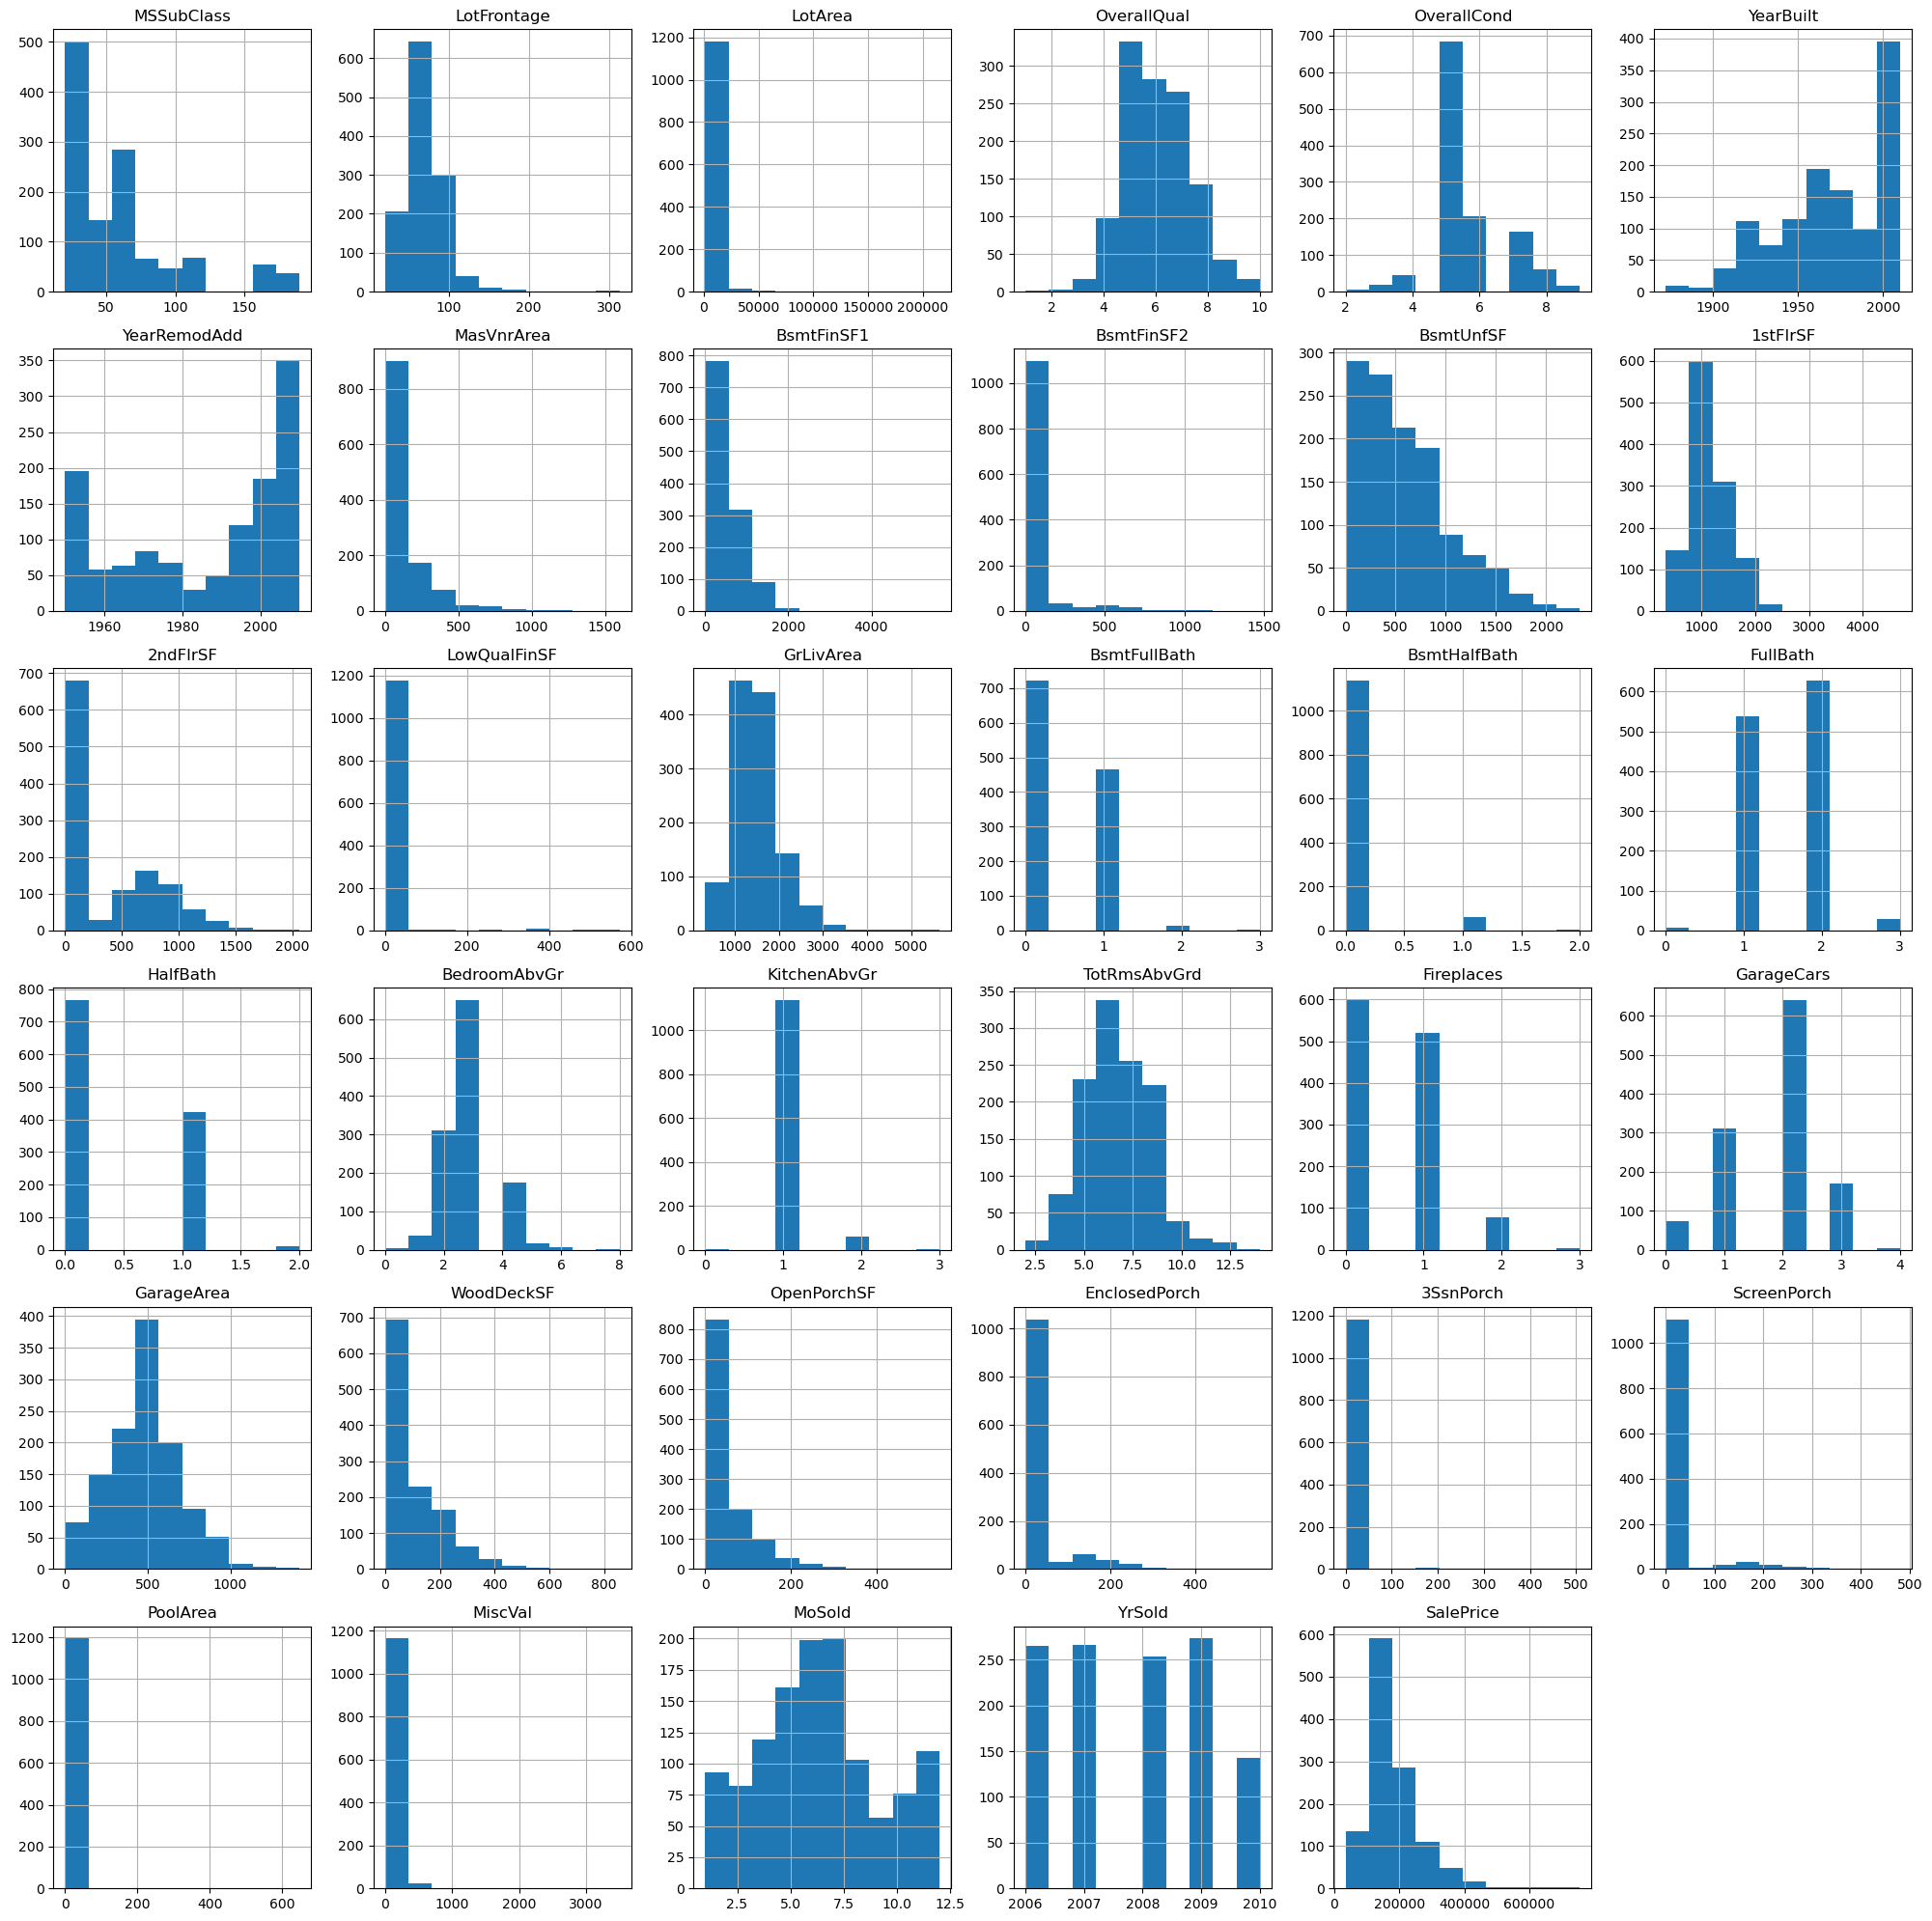

In [23]:
df.hist(figsize=(20, 20));
plt.tight_layout();


**Insights**:  
From the above plots, we see that the following columns have outliers:

1.LotArea (Right side)  
2.MasVnrArea (Right side)  
3.BsmtFinSF1 (Right side)  
4.BsmtFinSF2 (Right side)  
5.LowQualFinSF (Right side)  
6.WoodDeckSF (Right side)  
7.OpenPorchSF (Right side)  
8.EnclosedPorch (Right side)  
9.3SsnPorch (Right side)  
10.ScreenPorch (Right side)  
11.PoolArea (Right side) (But we can't remove this since most)    
12.MiscVal (Right side)  
13.SalePrice (Right side)  
Let us look at them

In [24]:
columns_to_work_on = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','LowQualFinSF','WoodDeckSF',
                     'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
# Let's find the number of rows under 95 percentile for each of these columns
for column in columns_to_work_on:
    q_hi  = df[column].quantile(0.95)
    print(column,len(df[(df[column] < q_hi)]))

LotArea 1140
MasVnrArea 1140
BsmtFinSF1 1140
BsmtFinSF2 1140
LowQualFinSF 0
WoodDeckSF 1139
OpenPorchSF 1139
EnclosedPorch 1140
3SsnPorch 0
ScreenPorch 1140
PoolArea 0
MiscVal 0


Let us analyse the zero columns individually

#### PoolArea

In [25]:
df[df.PoolArea>0]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
197           75       RL        174.0    25419   Pave      Reg         Lvl   
810           20       RL         78.0    10140   Pave      Reg         Lvl   
1170          80       RL         76.0     9880   Pave      Reg         Lvl   
1182          60       RL        160.0    15623   Pave      IR1         Lvl   
1298          60       RL        313.0    63887   Pave      IR3         Bnk   
1386          60       RL         80.0    16692   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope  ... 3SsnPorch ScreenPorch PoolArea  Fence  \
197     AllPub    Corner       Gtl  ...         0           0      512  GdPrv   
810     AllPub    Inside       Gtl  ...         0           0      648  GdPrv   
1170    AllPub    Inside       Gtl  ...         0           0      576  GdPrv   
1182    AllPub    Corner       Gtl  ...         0           0      555  MnPrv   
1298    AllPub    Corner       Gtl  ...         0           0      480     NA   
1386    AllPub    Inside       Gtl  ...         0         440      519  MnPrv   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
197        0       3    2006        WD        Abnorml    235000  
810        0       1    2006        WD         Normal    181000  
1170       0       7    2008        WD         Normal    171000  
1182       0       7    2007        WD        Abnorml    745000  
1298       0       1    2008       New        Partial    160000  
1386    2000       7    2006        WD         Normal    250000  

[6 rows x 75 columns]

Since only 7 rows have nonzero PoolArea, we can just remove the columnnce only 7 rows have nonzero PoolArea, we can just remove the column

In [26]:
df.drop(['PoolArea'],axis=1,inplace=True)

#### LowQualFinSF

In [27]:
df[df.LowQualFinSF>0]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
51            50       RM         52.0     6240   Pave      Reg         Lvl   
88            50  C (all)        105.0     8470   Pave      IR1         Lvl   
125          190       RM         60.0     6780   Pave      Reg         Lvl   
185           75       RM         90.0    22950   Pave      IR2         Lvl   
187           50       RL         60.0    10410   Pave      Reg         Lvl   
197           75       RL        174.0    25419   Pave      Reg         Lvl   
198           75       RM         92.0     5520   Pave      Reg         Lvl   
263           50       RM         50.0     5500   Pave      Reg         Lvl   
267           75       RL         60.0     8400   Pave      Reg         Bnk   
406           50       RL         51.0    10480   Pave      Reg         Lvl   
589           40       RM         50.0     9100   Pave      Reg         Lvl   
635          190       RH         60.0    10896   Pave      Reg         Bnk   
729           30       RM         52.0     6240   Pave      Reg         Lvl   
829          160       FV         24.0     2544   Pave      Reg         Lvl   
831          160       FV         30.0     3180   Pave      Reg         Lvl   
873           40       RL         60.0    12144   Pave      Reg         Lvl   
883           75       RL         60.0     6204   Pave      Reg         Bnk   
945           50       RM         98.0     8820   Pave      Reg         Lvl   
1009          50       RL         60.0     6000   Pave      Reg         Lvl   
1031          75       RL        102.0    15863   Pave      Reg         Lvl   
1173          50       RL        138.0    18030   Pave      IR1         Bnk   
1349          70       RM         50.0     5250   Pave      Reg         Lvl   
1364         160       FV         30.0     3180   Pave      Reg         Lvl   
1440          70       RL         79.0    11526   Pave      IR1         Bnk   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
51      AllPub    Inside       Gtl  ...             0         0           0   
88      AllPub    Corner       Gtl  ...           156         0           0   
125     AllPub    Inside       Gtl  ...             0         0           0   
185     AllPub    Inside       Gtl  ...             0         0         410   
187     AllPub    Inside       Gtl  ...             0       140           0   
197     AllPub    Corner       Gtl  ...           552         0           0   
198     AllPub    Corner       Gtl  ...            30         0           0   
263     AllPub    Corner       Gtl  ...             0         0           0   
267     AllPub    Inside       Mod  ...             0         0           0   
406     AllPub    Inside       Gtl  ...             0         0           0   
589     AllPub    Inside       Gtl  ...             0         0           0   
635     AllPub    Inside       Gtl  ...             0         0           0   
729     AllPub    Inside       Gtl  ...           112         0           0   
829     AllPub    Inside       Gtl  ...             0         0           0   
831     AllPub    Inside       Gtl  ...             0         0           0   
873     AllPub    Inside       Gtl  ...             0         0           0   
883     AllPub    Inside       Gtl  ...             0         0           0   
945     AllPub    Corner       Gtl  ...           244         0           0   
1009    AllPub    Inside       Gtl  ...           138         0           0   
1031    AllPub    Corner       Gtl  ...             0         0           0   
1173    AllPub    Inside       Gtl  ...             0         0           0   
1349    AllPub    Inside       Gtl  ...            20         0           0   
1364    AllPub    Inside       Gtl  ...             0         0           0   
1440    AllPub    Inside       Mod  ...             0         0           0   

      Fence MiscVal  MoSold  YrSold  SaleType  SaleCon

Since only 26 rows have nonzero LowQualFinSF, we can just remove the column

In [28]:
df.drop(['LowQualFinSF'],axis=1,inplace=True)

#### 3SsnPorch

In [29]:
df[df['3SsnPorch']>0]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
5             50       RL         85.0    14115   Pave      IR1         Lvl   
55            20       RL        100.0    10175   Pave      IR1         Lvl   
129           20       RL         69.0     8973   Pave      Reg         Lvl   
159           60       RL        134.0    19378   Pave      IR1         HLS   
182           20       RL         60.0     9060   Pave      Reg         Lvl   
187           50       RL         60.0    10410   Pave      Reg         Lvl   
205           20       RL         99.0    11851   Pave      Reg         Lvl   
258           60       RL         80.0    12435   Pave      Reg         Lvl   
280           60       RL         82.0    11287   Pave      Reg         Lvl   
546           50       RL         70.0     8737   Pave      IR1         Bnk   
704           20       RL         70.0     8400   Pave      Reg         Lvl   
744          120       RL         41.0     5395   Pave      IR1         HLS   
889           20       RL        128.0    12160   Pave      Reg         Lvl   
922           20       RL         65.0    10237   Pave      Reg         Lvl   
1080          20       RL         80.0    11040   Pave      Reg         Lvl   
1156          80       RL         85.0     9350   Pave      Reg         Lvl   
1181         120       RM         64.0     5587   Pave      IR1         HLS   
1437          20       RL         96.0    12444   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
5       AllPub    Inside       Gtl  ...             0       320           0   
55      AllPub    Inside       Gtl  ...             0       407           0   
129     AllPub    Inside       Gtl  ...             0       180           0   
159     AllPub    Corner       Gtl  ...             0       168           0   
182     AllPub    Inside       Gtl  ...             0       180           0   
187     AllPub    Inside       Gtl  ...             0       140           0   
205     AllPub    Corner       Gtl  ...             0       508           0   
258     AllPub    Inside       Gtl  ...             0       245           0   
280     AllPub    Inside       Gtl  ...             0       196           0   
546     AllPub    Inside       Gtl  ...             0       144           0   
704     AllPub    Inside       Gtl  ...             0       144           0   
744     AllPub    Inside       Gtl  ...            70       168           0   
889     AllPub    Inside       Gtl  ...             0       162           0   
922     AllPub    Inside       Gtl  ...             0        23           0   
1080    AllPub    Inside       Gtl  ...             0       216           0   
1156    AllPub    Inside       Gtl  ...             0        96           0   
1181    AllPub    Inside       Mod  ...             0       153           0   
1437    AllPub       FR2       Gtl  ...             0       304           0   

      Fence MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
5     MnPrv     700      10    2009        WD         Normal    143000  
55       NA       0       7    2008        WD         Normal    180500  
129    MnWw       0       7    2006        WD        Abnorml    150000  
159      NA       0       3    2006       New        Partial    320000  
182   MnPrv       0       6    2007        WD         Normal    120000  
187   MnPrv       0       8    2009        WD         Normal    135000  
205      NA       0       5    2009        WD         Normal    180500  
258      NA       0       5    2008        WD         Normal    231500  
280      NA       0       1    2007        WD         Normal    228500  
546      NA       0       5    2007        WD         Normal    210000  
704      NA       0       5    2010        WD         Normal    213000  
744      NA       0      10    2008        WD         Normal    180000  
889      NA       0       2    2009        WD        

Since only 24 rows have nonzero LowQualFinSF, we can just remove the column

In [30]:
df.drop(['3SsnPorch'],axis=1,inplace=True)

#### MiscVal

In [31]:
df[df.MiscVal>0]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
5             50       RL         85.0    14115   Pave      IR1         Lvl   
17            90       RL         72.0    10791   Pave      Reg         Lvl   
51            50       RM         52.0     6240   Pave      Reg         Lvl   
98            30       RL         85.0    10625   Pave      Reg         Lvl   
99            20       RL         77.0     9320   Pave      IR1         Lvl   
106           30       RM         60.0    10800   Pave      Reg         Lvl   
250           30       RL         55.0     5350   Pave      IR1         Lvl   
338           20       RL         91.0    14145   Pave      Reg         Lvl   
439           50       RL         67.0    12354   Pave      Reg         Lvl   
499           20       RL         70.0     7535   Pave      IR1         Lvl   
502           20       RL         70.0     9170   Pave      Reg         Lvl   
510           20       RL         75.0    14559   Pave      Reg         Lvl   
589           40       RM         50.0     9100   Pave      Reg         Lvl   
634           90       RL         64.0     6979   Pave      Reg         Lvl   
705          190       RM         70.0     5600   Pave      Reg         Lvl   
725           20       RL         60.0     6960   Pave      Reg         Lvl   
733           20       RL         80.0    10000   Pave      Reg         Lvl   
760           20       RL         70.0     9100   Pave      Reg         Lvl   
766           60       RL         80.0    10421   Pave      Reg         Lvl   
767           50       RL         75.0    12508   Pave      IR1         Lvl   
786           50       RM         60.0    10800   Pave      Reg         Lvl   
800           60       RL         79.0    12798   Pave      IR1         HLS   
812           20  C (all)         66.0     8712   Grvl      Reg         Bnk   
813           20       RL         75.0     9750   Pave      Reg         Lvl   
867           20       RL         85.0     6970   Pave      Reg         Lvl   
878           85       RL         88.0    11782   Pave      IR1         Lvl   
890           50       RL         60.0     8064   Pave      Reg         Lvl   
912           30       RM         51.0     6120   Pave      Reg         Lvl   
1061          30  C (all)        120.0    18000   Grvl      Reg         Low   
1076          50       RL         60.0    10800   Pave      Reg         Lvl   
1083          20       RL         80.0     8800   Pave      Reg         Lvl   
1171          20       RL         76.0     9120   Pave      Reg         Lvl   
1210          60       RL         70.0    11218   Pave      Reg         Lvl   
1252          20       RL         62.0     9858   Pave      Reg         Lvl   
1328          50       RM         60.0    10440   Pave      Reg         Lvl   
1386          60       RL         80.0    16692   Pave      IR1         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch ScreenPorch  \
5       AllPub    Inside       Gtl  ...          30             0           0   
17      AllPub    Inside       Gtl  ...           0             0           0   
51      AllPub    Inside       Gtl  ...           0             0           0   
98      AllPub    Corner       Gtl  ...           0            77           0   
99      AllPub    Inside       Gtl  ...           0             0           0   
106     AllPub    Inside       Gtl  ...           0             0           0   
250     AllPub    Inside       Gtl  ...           0             0           0   
338     AllPub    Corner       Gtl  ...          45             0           0   
439     AllPub    Corner       Gtl  ...          46             0           0   
499     AllPub    Inside       Gtl  ...         285             0           0   
502     AllPub    Corner       Gtl  ...           0           184           0   
510     AllPub    Inside       

Since only 52 rows have nonzero MiscVal, we can just remove the column

In [32]:
df.drop(['MiscVal'],axis=1,inplace=True)

In [33]:
columns_to_work_on = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','WoodDeckSF',
                     'OpenPorchSF','EnclosedPorch','ScreenPorch']
# Let's find the number of rows under 95 percentile for each of these columns
for column in columns_to_work_on:
    q_hi  = df[column].quantile(0.99)
    print(column,len(df[(df[column] < q_hi)]))

LotArea 1188
MasVnrArea 1188
BsmtFinSF1 1188
BsmtFinSF2 1188
WoodDeckSF 1188
OpenPorchSF 1188
EnclosedPorch 1188
ScreenPorch 1188


In [34]:
#Looks good. We can now drop the outlier rows
for column in columns_to_work_on:
    q_hi  = df[column].quantile(0.99)
    df = df[(df[column] < q_hi)]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1104 entries, 0 to 1457
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1104 non-null   int64  
 1   MSZoning       1104 non-null   object 
 2   LotFrontage    1104 non-null   float64
 3   LotArea        1104 non-null   int64  
 4   Street         1104 non-null   object 
 5   LotShape       1104 non-null   object 
 6   LandContour    1104 non-null   object 
 7   Utilities      1104 non-null   object 
 8   LotConfig      1104 non-null   object 
 9   LandSlope      1104 non-null   object 
 10  Neighborhood   1104 non-null   object 
 11  Condition1     1104 non-null   object 
 12  Condition2     1104 non-null   object 
 13  BldgType       1104 non-null   object 
 14  HouseStyle     1104 non-null   object 
 15  OverallQual    1104 non-null   int64  
 16  OverallCond    1104 non-null   int64  
 17  YearBuilt      1104 non-null   int64  
 18  YearRemo

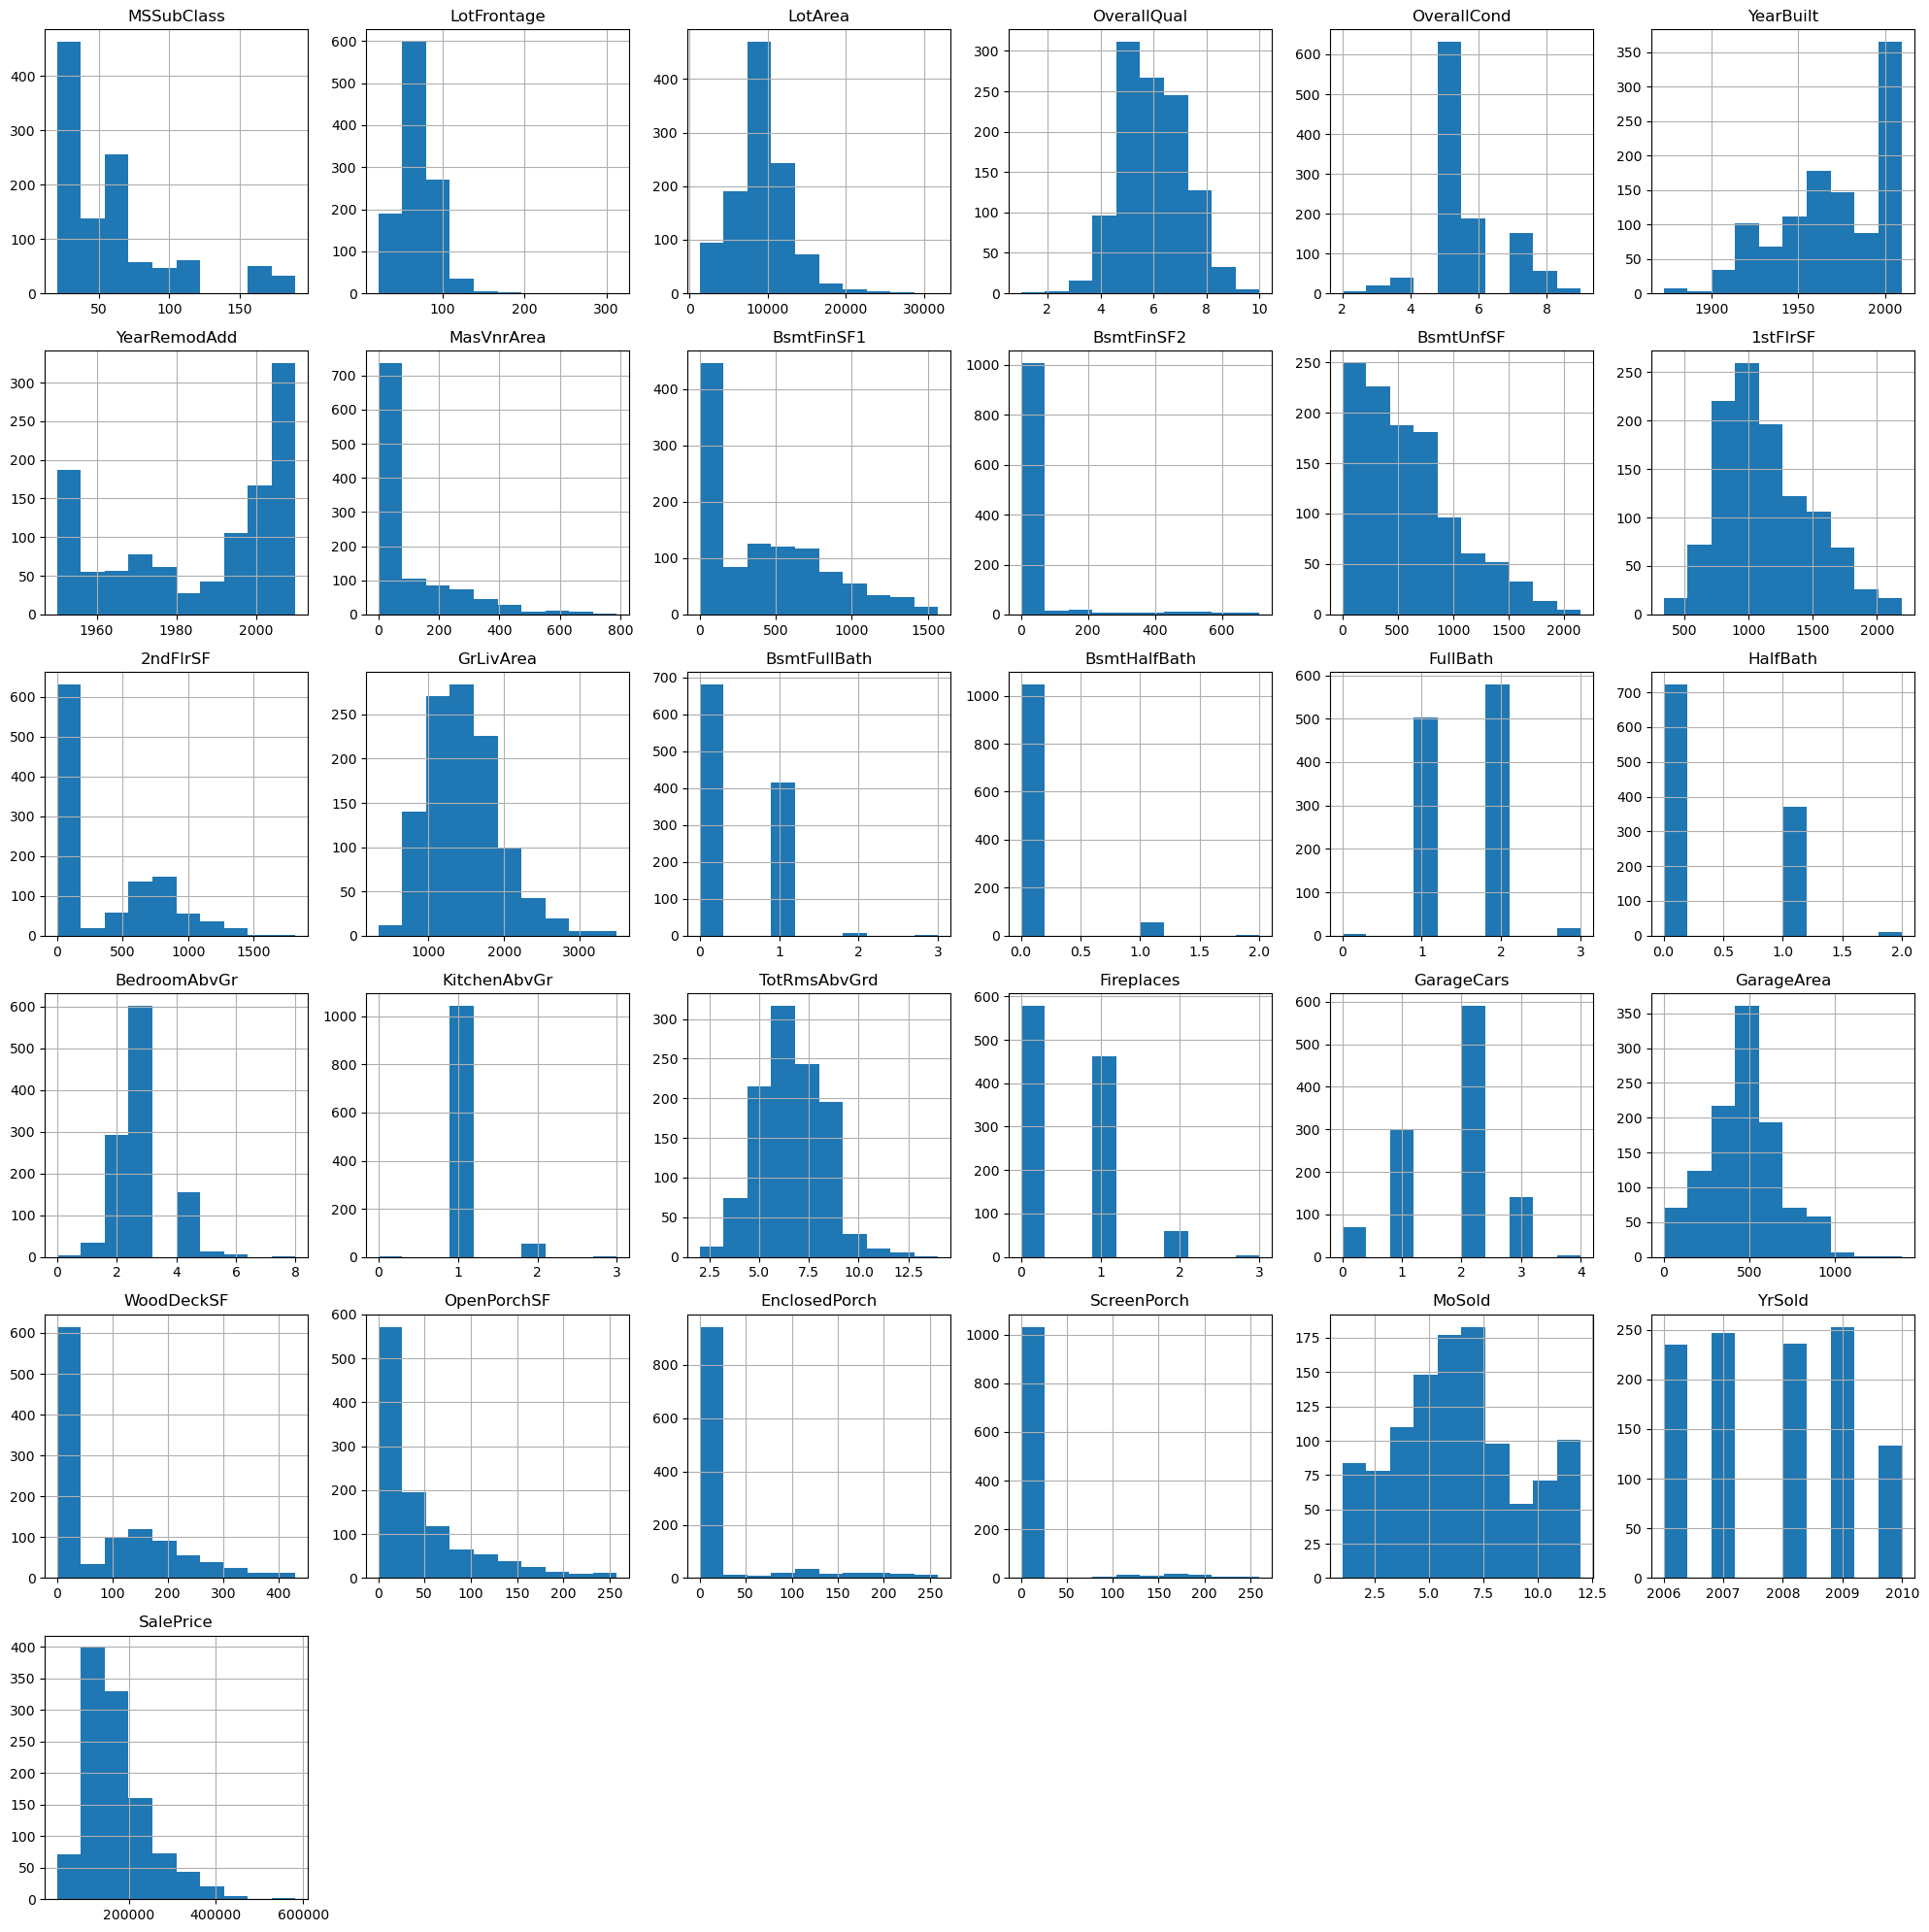

In [36]:
df.hist(figsize=(20, 20));
plt.tight_layout();

C:\Users\yadav_erlkrsl\AppData\Local\Temp\ipykernel_19280\3615994163.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

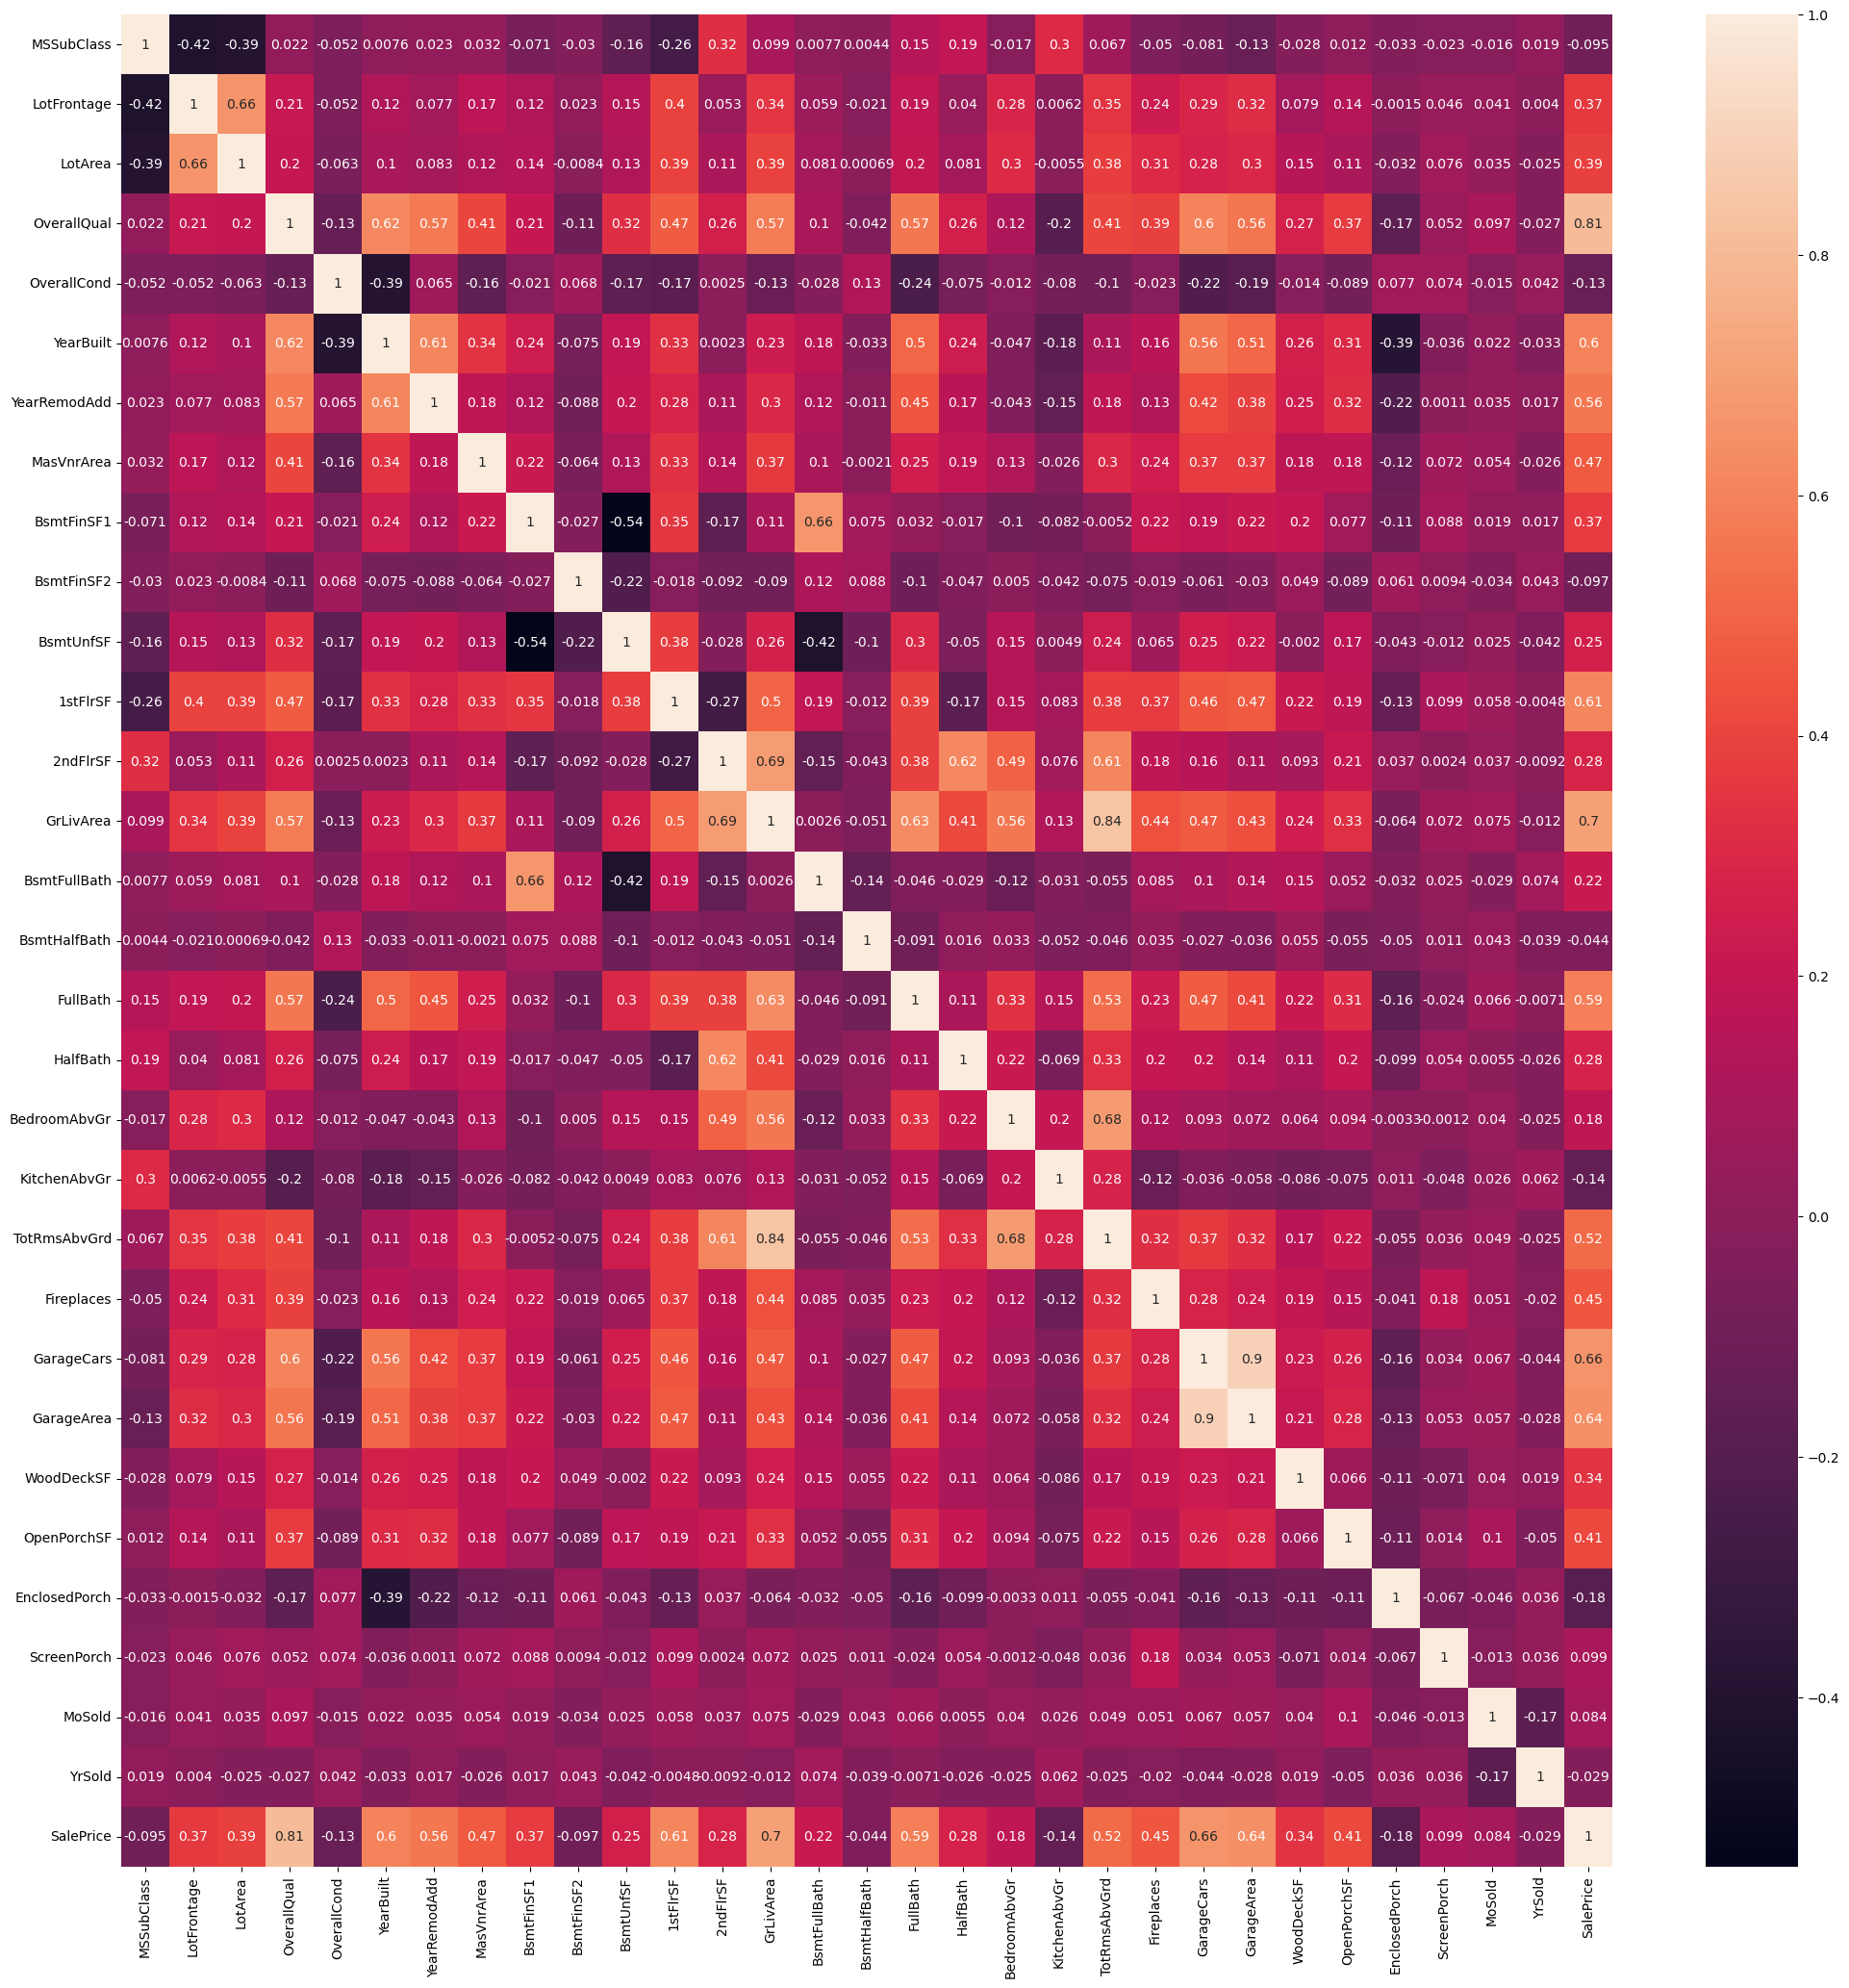

In [37]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

Here's the list of strongly correlated terms:

GarageArea - GarageCars: 0.89  
TotRmsAbvGrd - GrLivArea: 0.83  
We can simply remove one of the pairs. Considering the actual areas would be better owing to their physical significance.   
So let us drop GarageCars and TotRmsAbvGrd

Text(0, 0.5, 'GrLivArea')

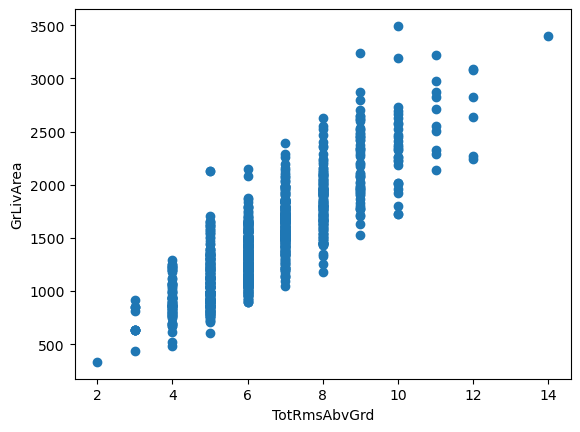

In [38]:
plt.scatter(df.TotRmsAbvGrd,df.GrLivArea)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('GrLivArea')

Text(0, 0.5, 'GarageCars')

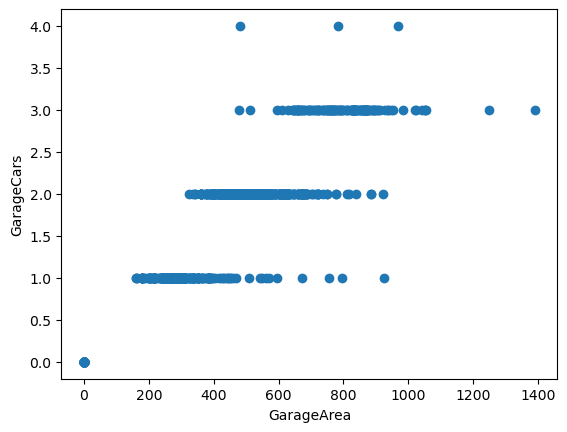

In [39]:
plt.scatter(df.GarageArea,df.GarageCars)
plt.xlabel('GarageArea')
plt.ylabel('GarageCars')

In [40]:
df.drop(['GarageCars','TotRmsAbvGrd'],axis=1,inplace=True)

## Categorizing the columns
We can have each column into one of the following buckets:  
1.Numerical  
2.Nominal  
3.Ordinal  
Let's look at what columns fall in each category

In [41]:
num_cols = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
           'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','1stFlrSF','2ndFlrSF',
           'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
            'Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
           'ScreenPorch','MoSold','YrSold','MasVnrArea','SalePrice']
nom_cols = ['MSSubClass','MSZoning','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
            'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
           'Heating','Electrical','Functional','GarageType','SaleType',
           'SaleCondition']
ord_cols = ['Street','LotShape','LandContour','Utilities','LandSlope','ExterQual',
            'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
           'HeatingQC','CentralAir','KitchenQual','FireplaceQu','GarageFinish',
           'GarageQual','GarageCond','PavedDrive','Fence']

#### Basic EDA

<Axes: >

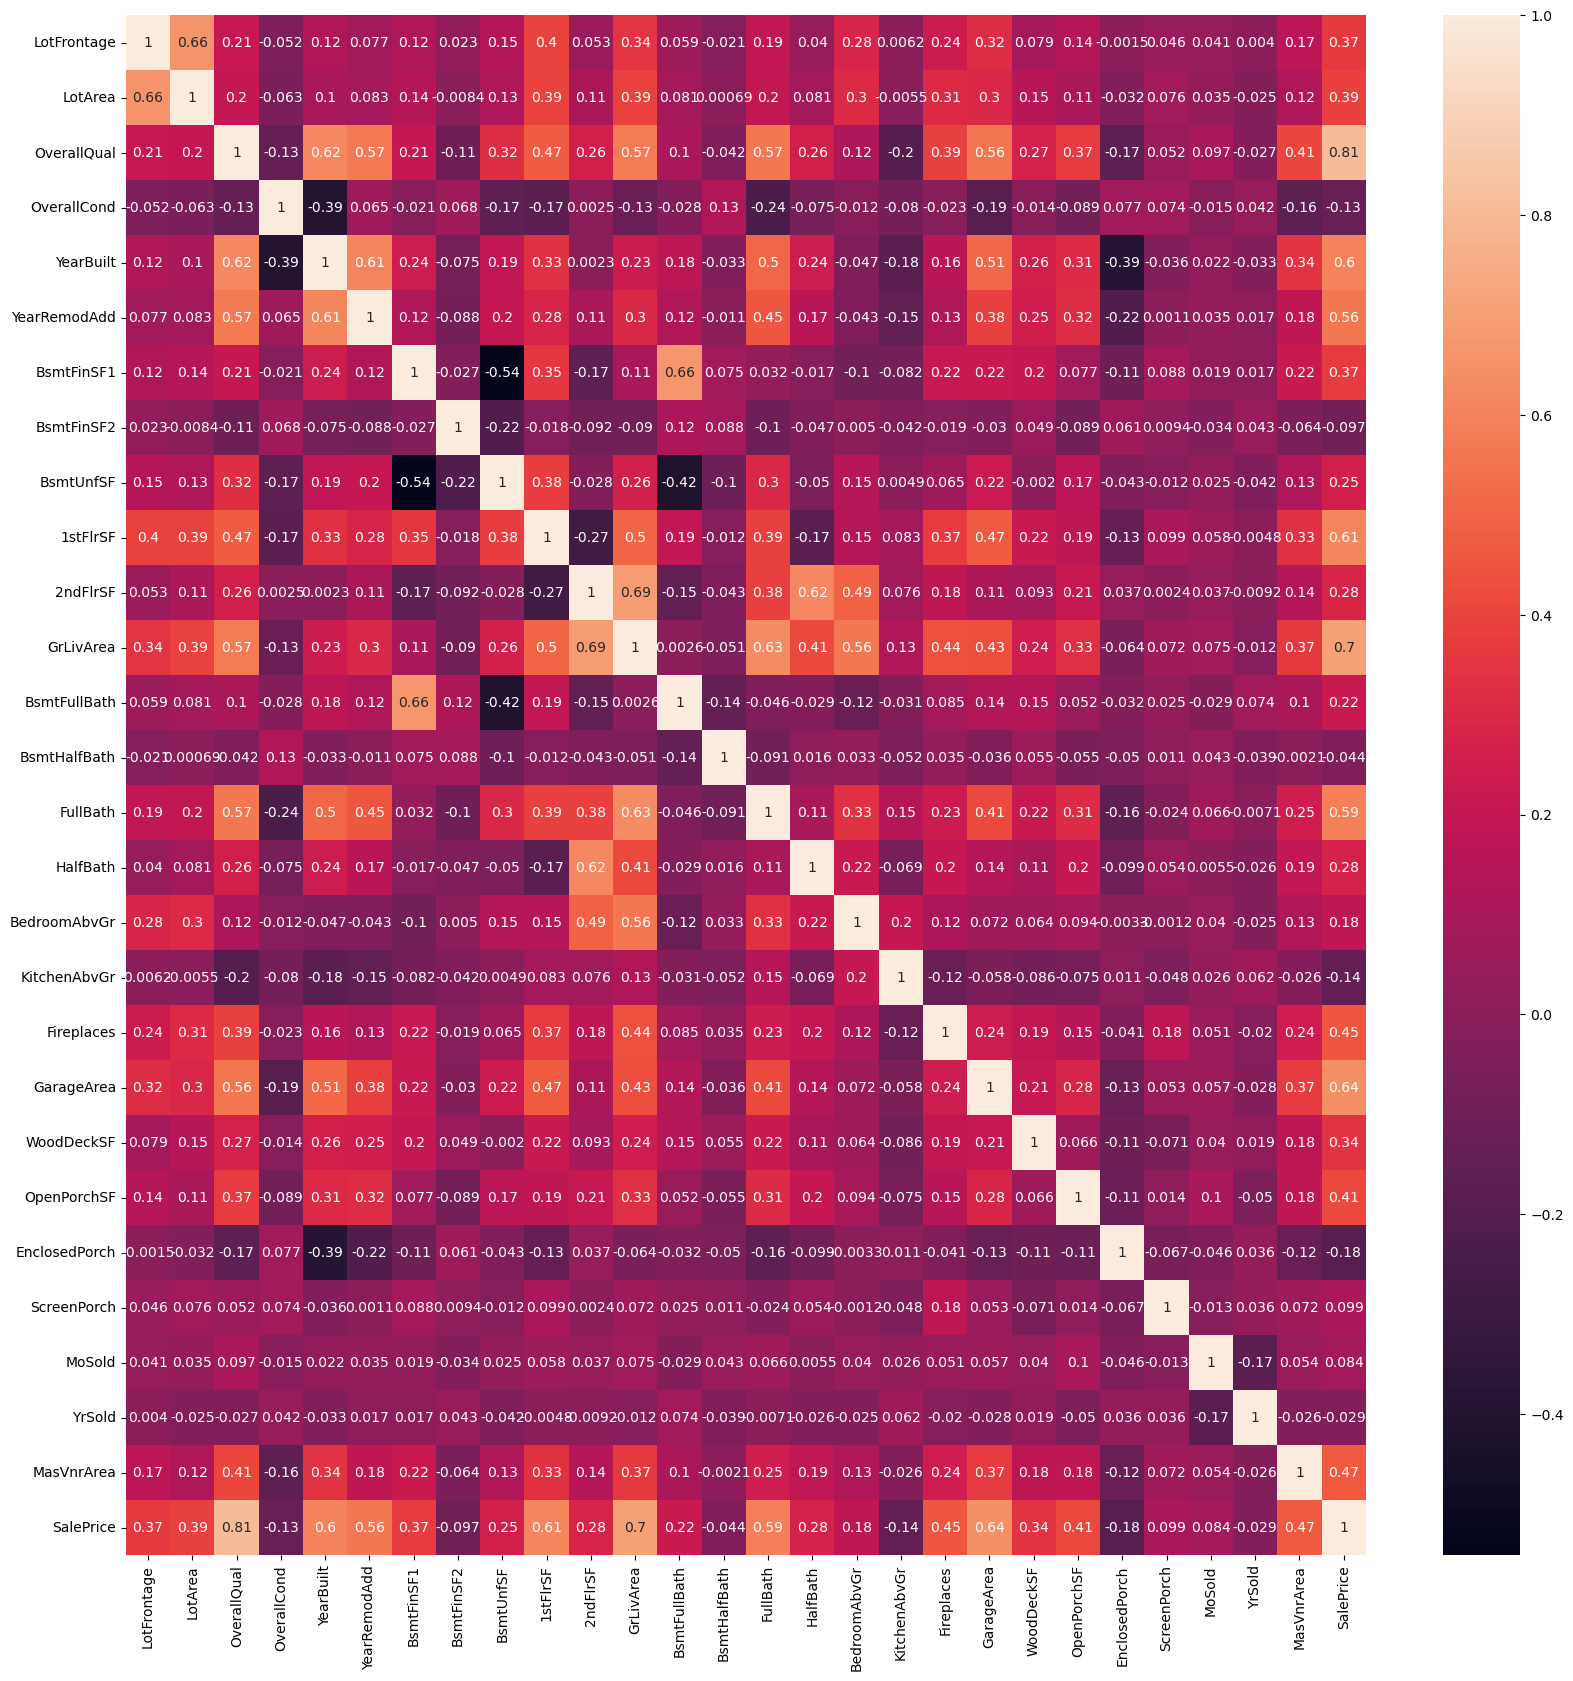

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(df[num_cols].corr(),annot=True)

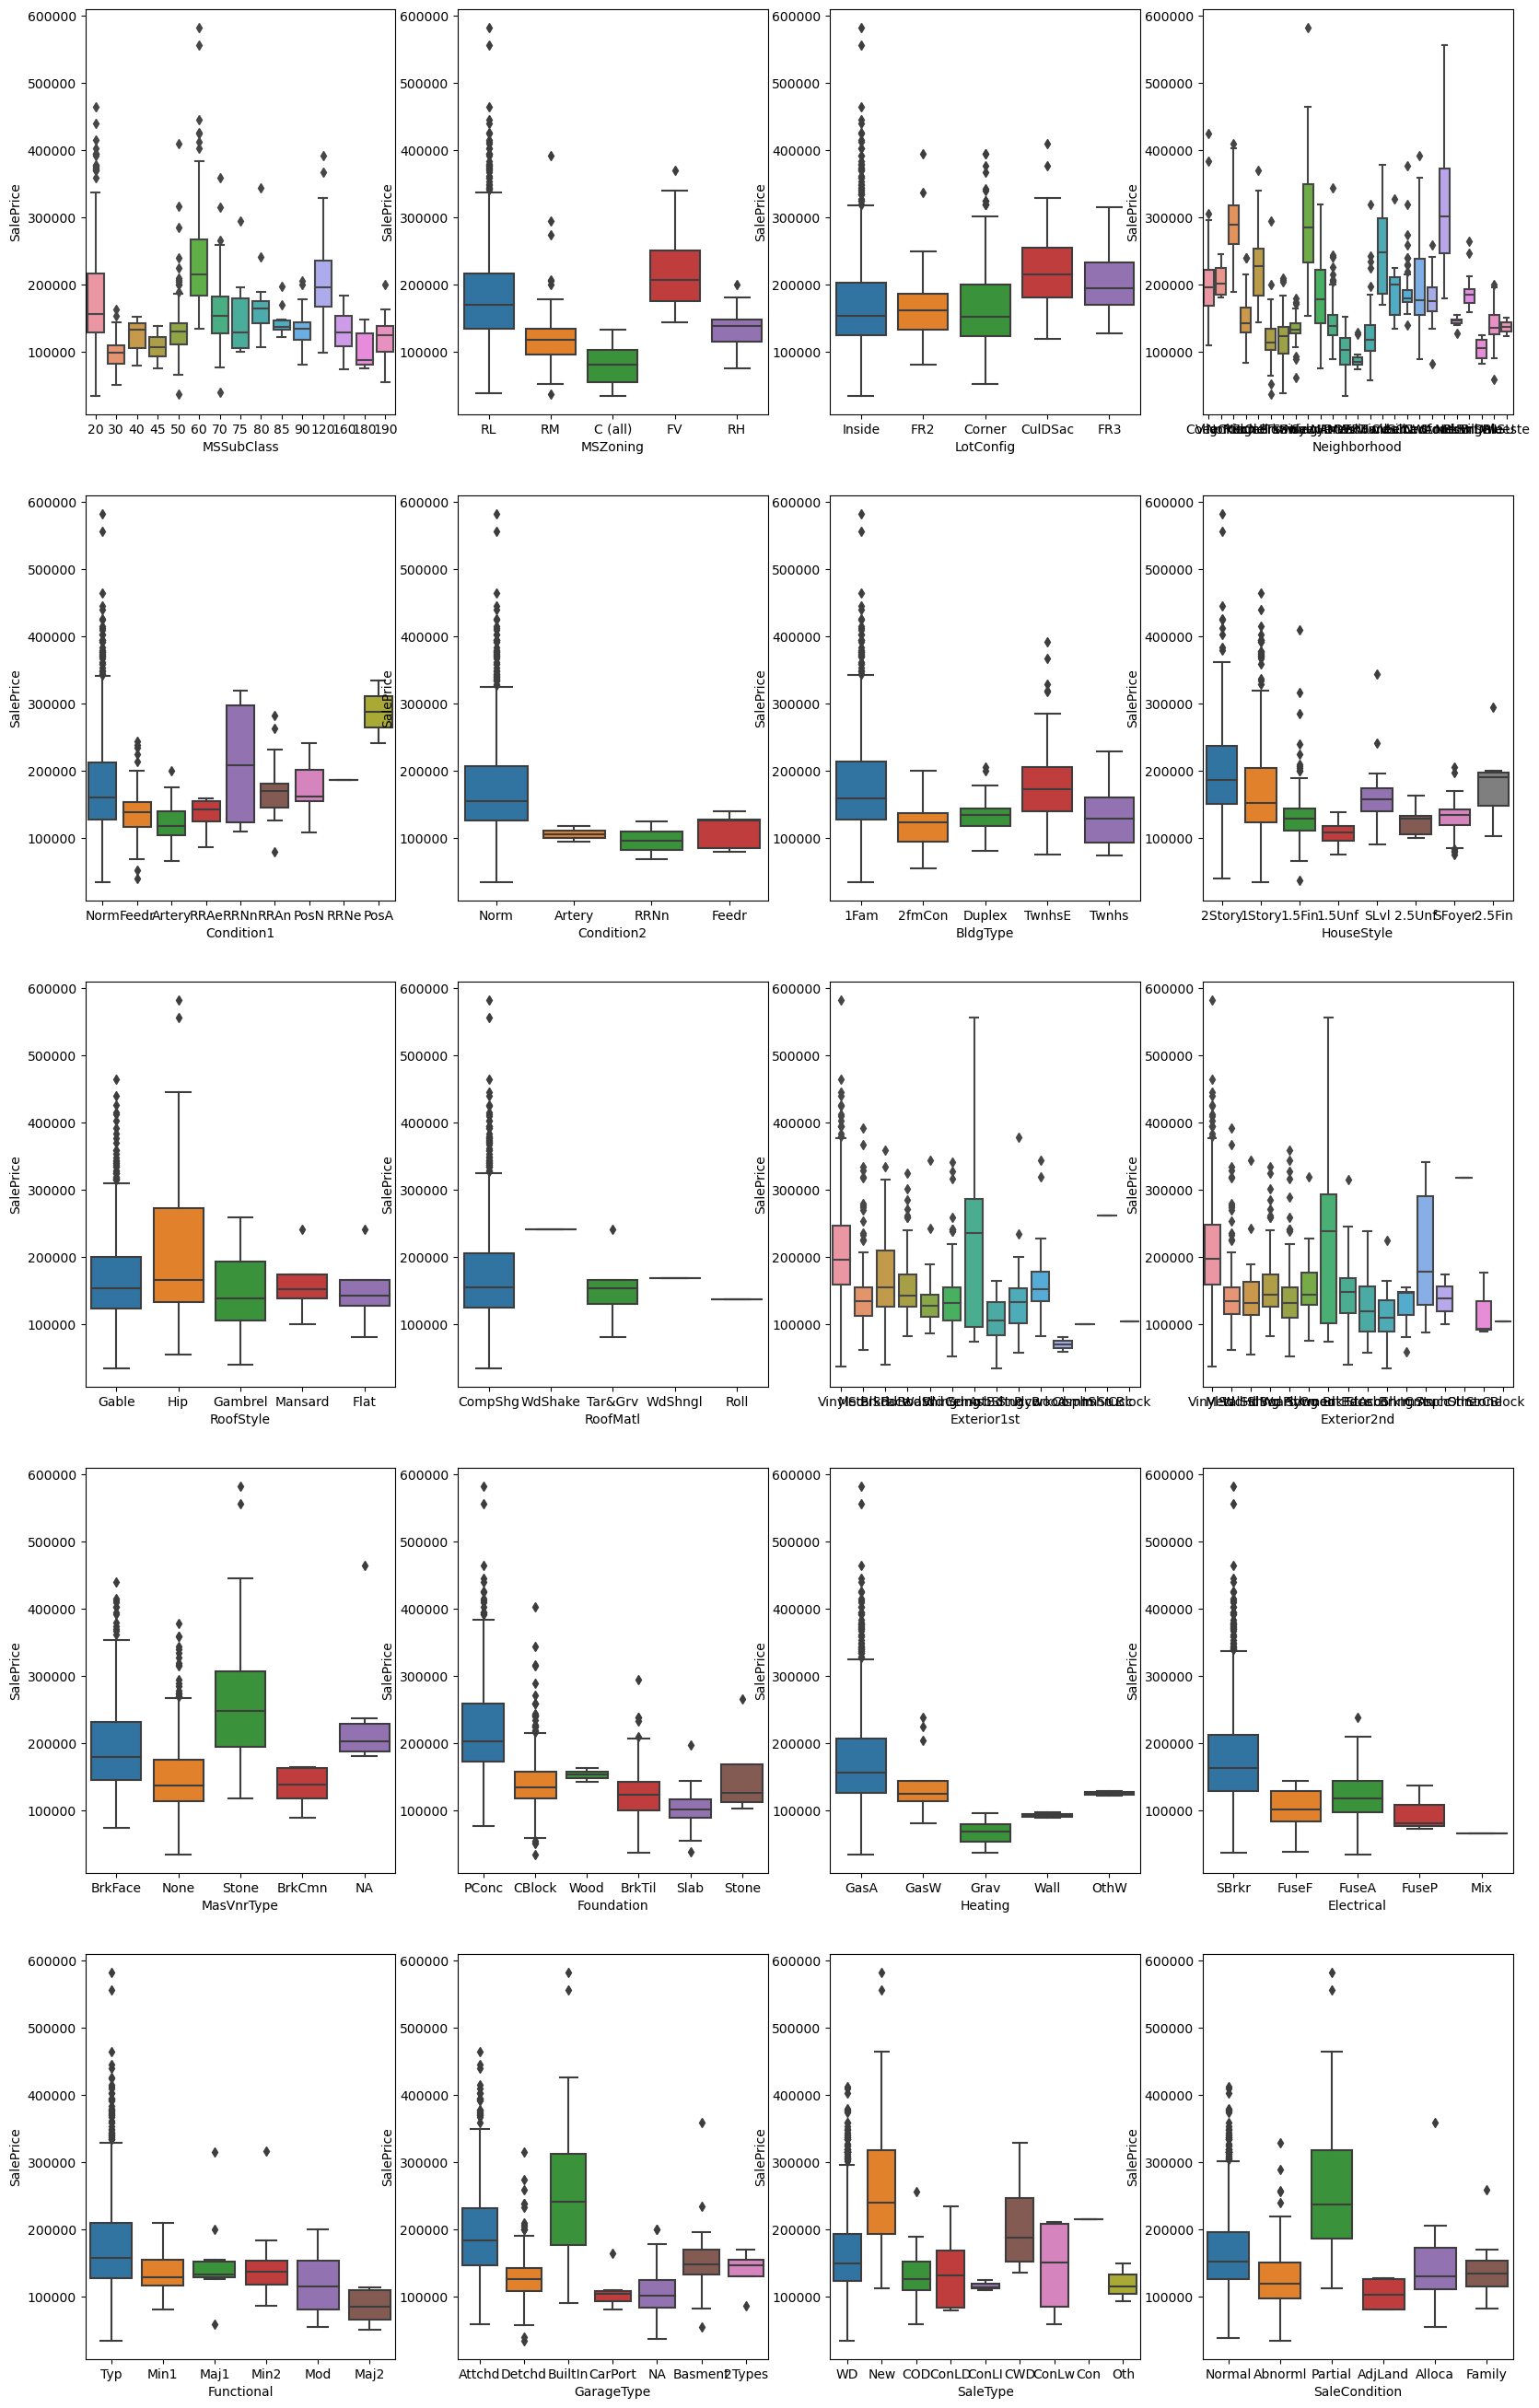

In [43]:
plt.figure(figsize=(20,40))
i = 1
for col in list(nom_cols):
    plt.subplot(len(nom_cols)//4+1,4,i)
    sns.boxplot(data=df, y = 'SalePrice',x = col)
    i+=1
plt.show()    

**Insights**:
All nominal variables seem to have some effect on the SalePrice. We can't comment direct which ones we wouldn't need

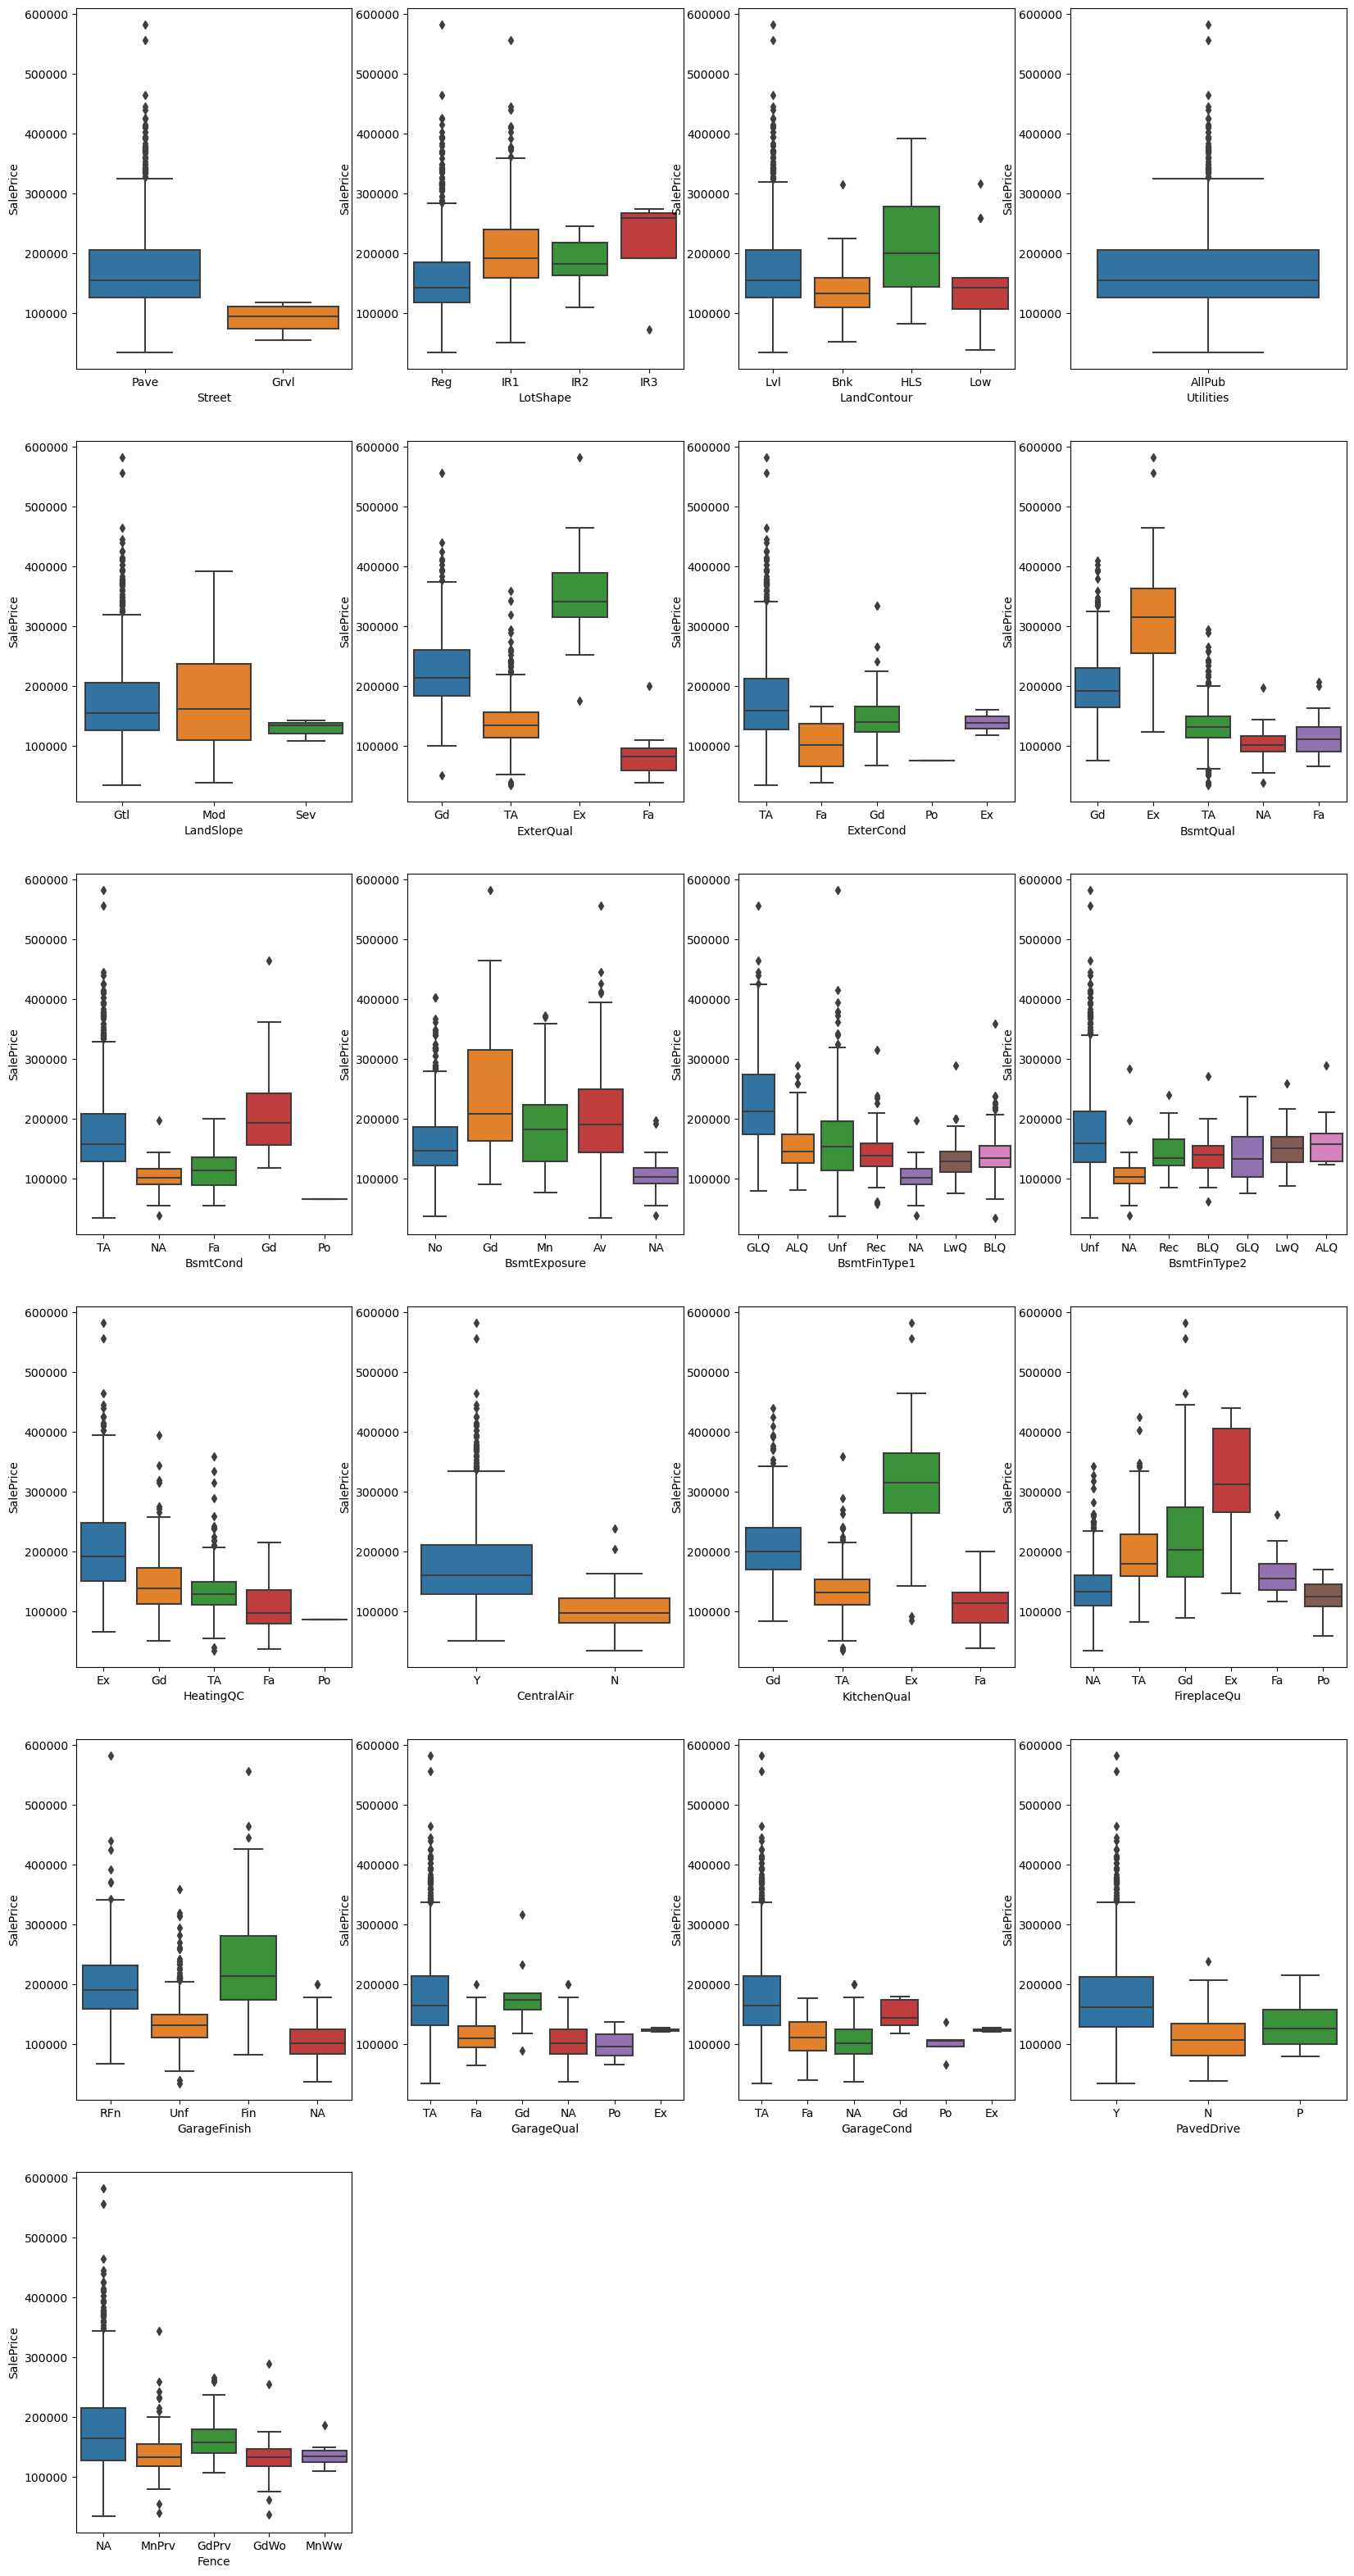

In [44]:
plt.figure(figsize=(20,40))
i = 1
for col in list(ord_cols):
    plt.subplot(len(ord_cols)//4+1,4,i)
    sns.boxplot(data=df, y = 'SalePrice',x = col)
    i+=1
plt.show()    

In [45]:
df.drop(['Utilities'],axis=1,inplace=True)
ord_cols.remove('Utilities')

All ordinal variables seem to have some effect on the SalePrice. We can't comment direct which ones we wouldn't need

### Feature Engineering

#### Nominal to numeric

In [46]:
for col in nom_cols:
    df[col] = df[col].apply(lambda x: col+'_'+str(x))
    status = pd.get_dummies(df[col],drop_first=True)
    df = pd.concat([df,status],axis=1)
    df=df.drop(col,axis=1)

In [47]:
df.head()

LotFrontage  LotArea Street LotShape LandContour LandSlope  OverallQual  \
0         65.0     8450   Pave      Reg         Lvl       Gtl            7   
1         80.0     9600   Pave      Reg         Lvl       Gtl            6   
2         68.0    11250   Pave      IR1         Lvl       Gtl            7   
4         84.0    14260   Pave      IR1         Lvl       Gtl            8   
5         85.0    14115   Pave      IR1         Lvl       Gtl            5   

   OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI SaleType_ConLw  \
0            5       2003          2003  ...               0              0   
1            8       1976          1976  ...               0              0   
2            5       2001          2002  ...               0              0   
4            5       2000          2000  ...               0              0   
5            5       1993          1995  ...               0              0   

  SaleType_New SaleType_Oth SaleType_WD SaleCondition_AdjLand  \
0            0            0           1                     0   
1            0            0           1                     0   
2            0            0           1                     0   
4            0            0           1                     0   
5            0            0           1                     0   

  SaleCondition_Alloca  SaleCondition_Family SaleCondition_Normal  \
0                    0                     0                    1   
1                    0                     0                    1   
2                    0                     0                    1   
4                    0                     0                    1   
5                    0                     0                    1   

   SaleCondition_Partial  
0                      0  
1                      0  
2                      0  
4                      0  
5                      0  

[5 rows x 193 columns]

#### Ordinal to numeric

In [48]:
df['Street'] = df.Street.map({'Grvl':0,'Pave':1})
df['LotShape'] = df.LotShape.map({'IR3':0,'IR2':1,'IR1':2,'Reg':3})
df['LandContour'] = df.LandContour.map({'Low':0,'HLS':1,'Bnk':2,'Lvl':3})
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['FireplaceQu'] = df.FireplaceQu.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['PavedDrive'] = df.PavedDrive.map({'N':0,'P':1,'Y':2})
df['Fence'] = df.Fence.map({'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})

<Axes: >

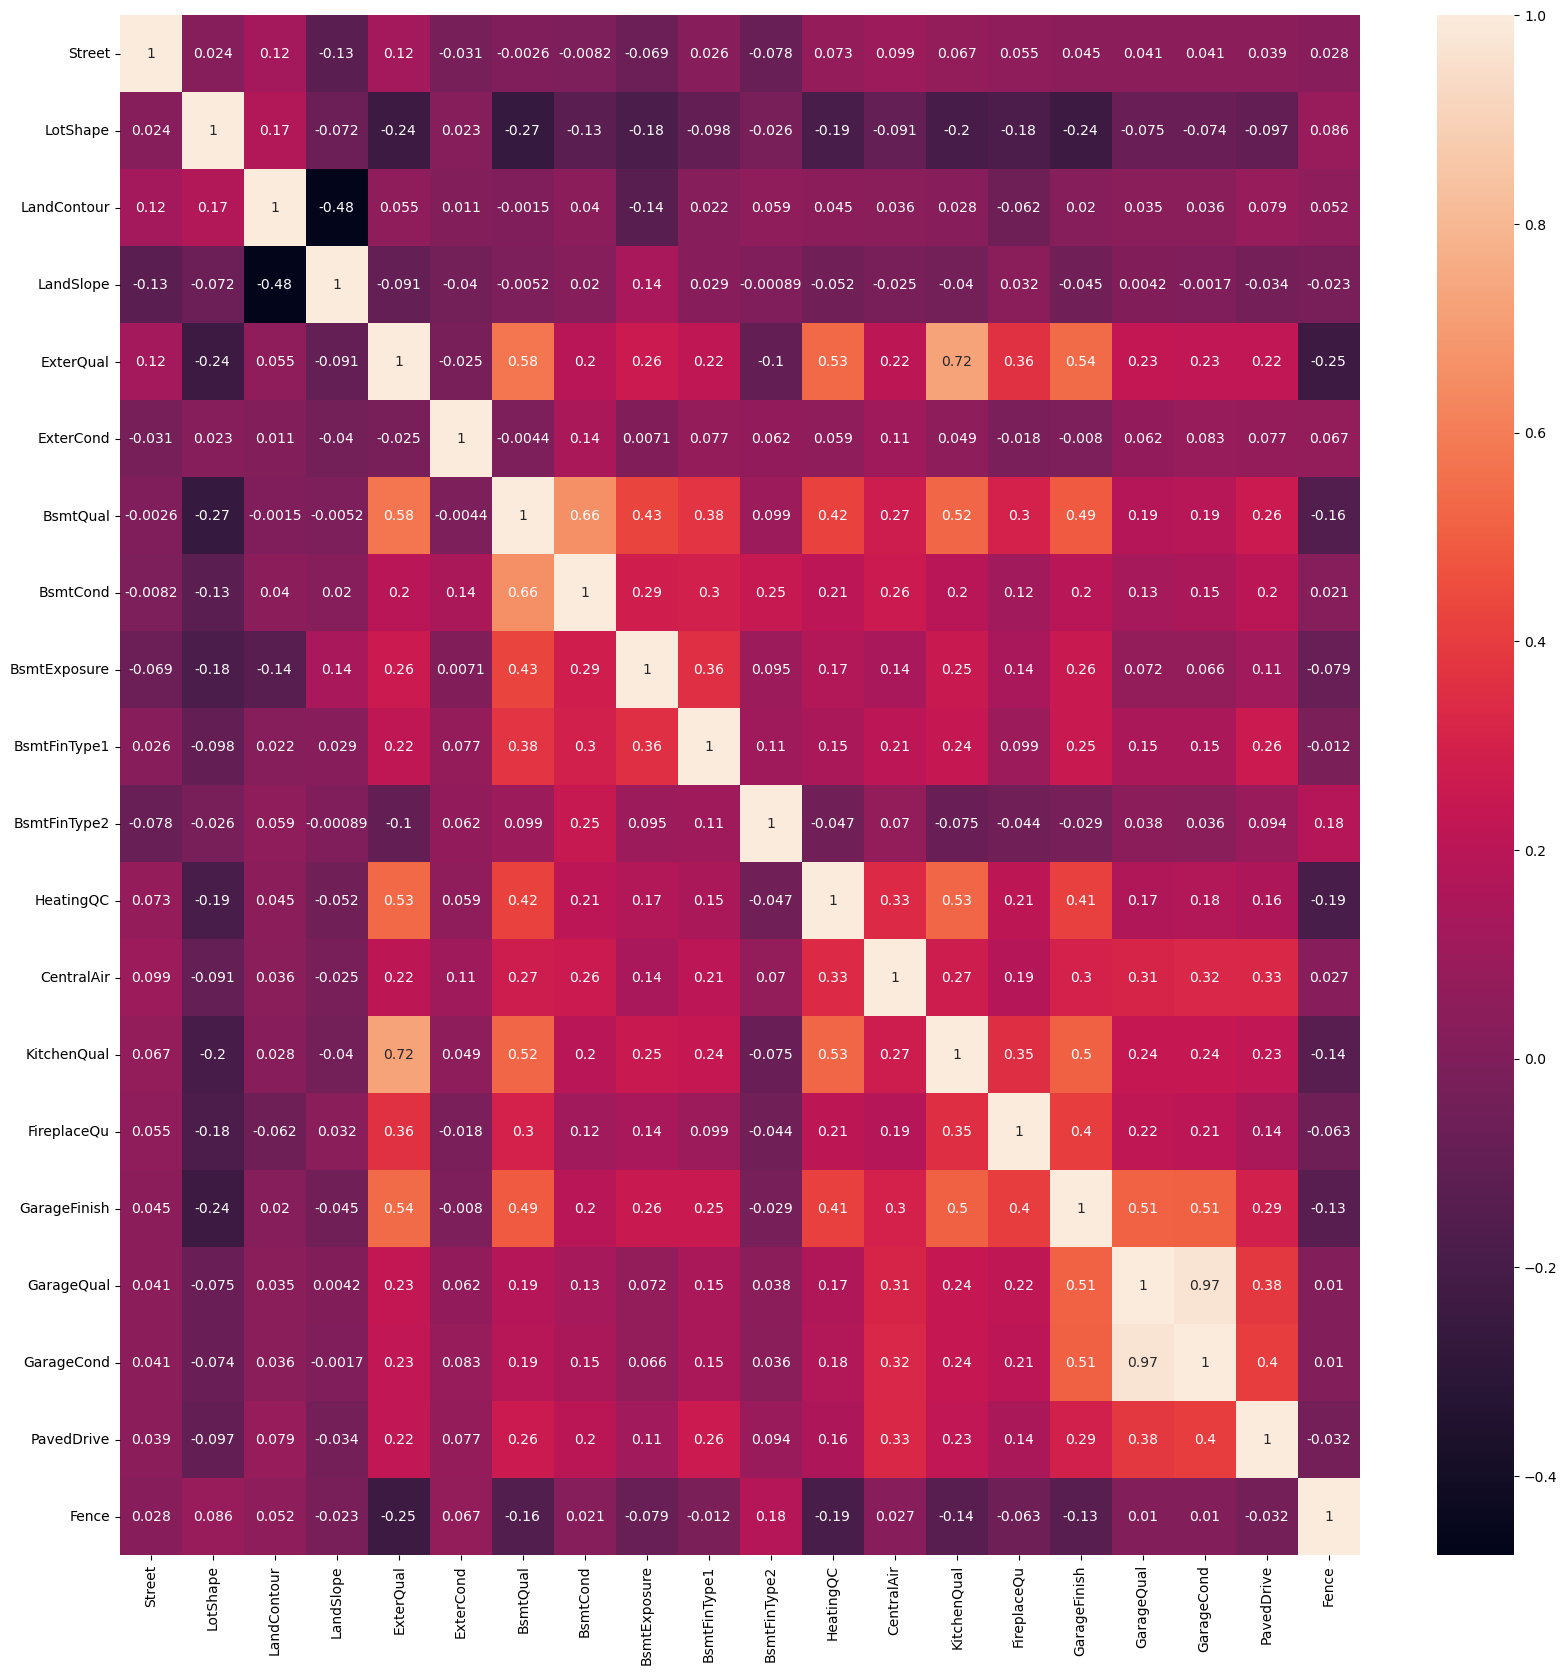

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(df[ord_cols].corr(),annot=True)

In [50]:
# Also observe the strong correlation between GarageQual and GarageCond.
# Let's remove GarageQual (it doesn't sound right. No one uses that phrase)
df.drop(['GarageQual'],axis=1,inplace=True)
ord_cols.remove('GarageQual')

<Axes: >

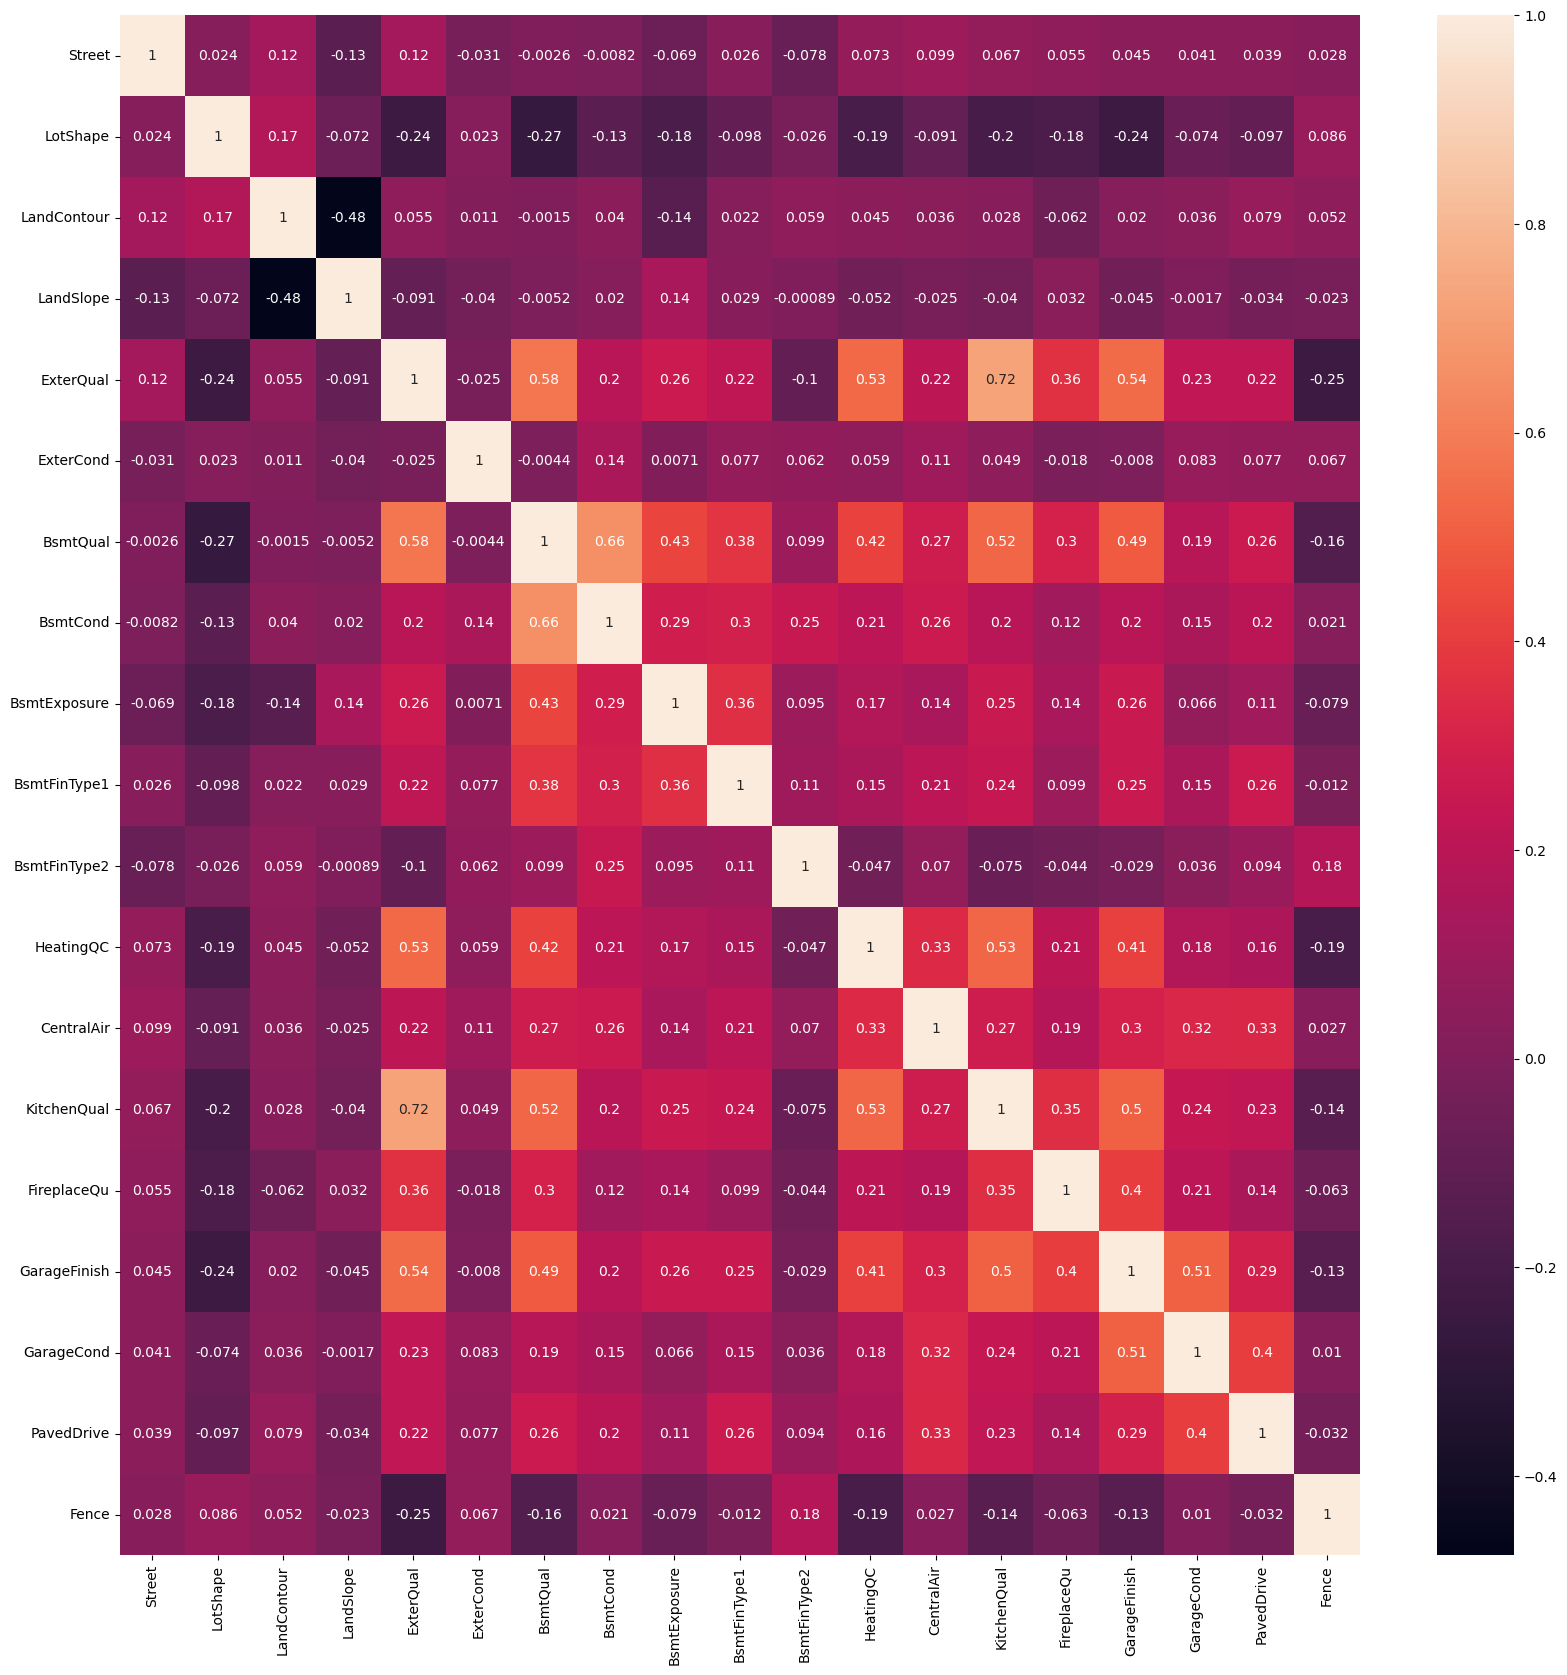

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(df[ord_cols].corr(),annot=True)

#### Data splitting to test and training

In [52]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=100)

#### Rescaling features

In [53]:
scaler = MinMaxScaler()

df_train[num_cols+ord_cols] = scaler.fit_transform(df_train[num_cols+ord_cols])
df_train.head()

LotFrontage   LotArea  Street  LotShape  LandContour  LandSlope  \
350      0.160959  0.247438     1.0  0.666667          1.0        0.0   
1350     0.239726  0.392524     1.0  1.000000          1.0        0.0   
1194     0.202055  0.306034     1.0  1.000000          1.0        0.0   
278      0.294521  0.499051     1.0  1.000000          1.0        0.0   
642      0.184932  0.476660     1.0  1.000000          1.0        0.0   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI  \
350      0.888889     0.428571   0.978261      0.950000  ...               0   
1350     0.444444     0.428571   0.702899      0.316667  ...               0   
1194     0.555556     0.714286   0.702899      0.316667  ...               0   
278      0.888889     0.428571   0.971014      0.950000  ...               0   
642      0.777778     0.714286   0.724638      0.750000  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
350                0             1             0            0   
1350               0             0             0            1   
1194               0             0             0            1   
278                0             1             0            0   
642                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
350                       0                     0                     0   
1350                      0                     0                     0   
1194                      0                     0                     0   
278                       0                     0                     0   
642                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
350                      0                      1  
1350                     1                      0  
1194                     1                      0  
278                      0                      1  
642                      1                      0  

[5 rows x 192 columns]

In [54]:
df_test[num_cols+ord_cols] = scaler.transform(df_test[num_cols+ord_cols])

### Feature selection
#### RFE
* Let us use use RFE to cut down the number of columns to 30. We shall perform RFE over simple linear regression, since we do not know the optimal regularization constants for lasso and ridge yet.

In [60]:
X_train = df_train.drop(['SalePrice'],axis=1)
y_train = df_train.SalePrice
X_test = df_test.drop(['SalePrice'],axis=1)
y_test = df_test.SalePrice

In [61]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=30)
rfe = rfe.fit(X_train,y_train)

In [62]:
col = list(X_train.columns[rfe.support_])

In [63]:
X_train = df_train[col]
X_test = df_test[col]

In [64]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by = 'VIF',ascending=False)
print(vif)

                 Features    VIF
2                  Street  70.06
3             OverallQual  48.65
7               ExterCond  41.27
23    Exterior1st_CemntBd  35.95
25    Exterior2nd_CmentBd  35.90
5               YearBuilt  28.67
10           BedroomAbvGr  25.38
6               ExterQual  21.84
9               GrLivArea  19.78
13         MSSubClass_190  18.61
4             OverallCond  18.52
19        BldgType_2fmCon  18.50
11            KitchenQual  15.22
0             LotFrontage  13.64
1                 LotArea  12.46
12             GarageArea  10.20
14          MSSubClass_75   9.55
22      HouseStyle_2.5Unf   5.39
21      HouseStyle_2.5Fin   5.17
8              BsmtFinSF1   2.40
29  SaleCondition_Partial   1.58
15   Neighborhood_NridgHt   1.48
20         BldgType_Twnhs   1.41
17        Condition1_PosA   1.27
27           Heating_OthW   1.20
16   Neighborhood_StoneBr   1.18
18        Condition1_RRNn   1.07
24    Exterior2nd_Brk Cmn   1.07
26        Foundation_Wood   1.06
28        

<Axes: >

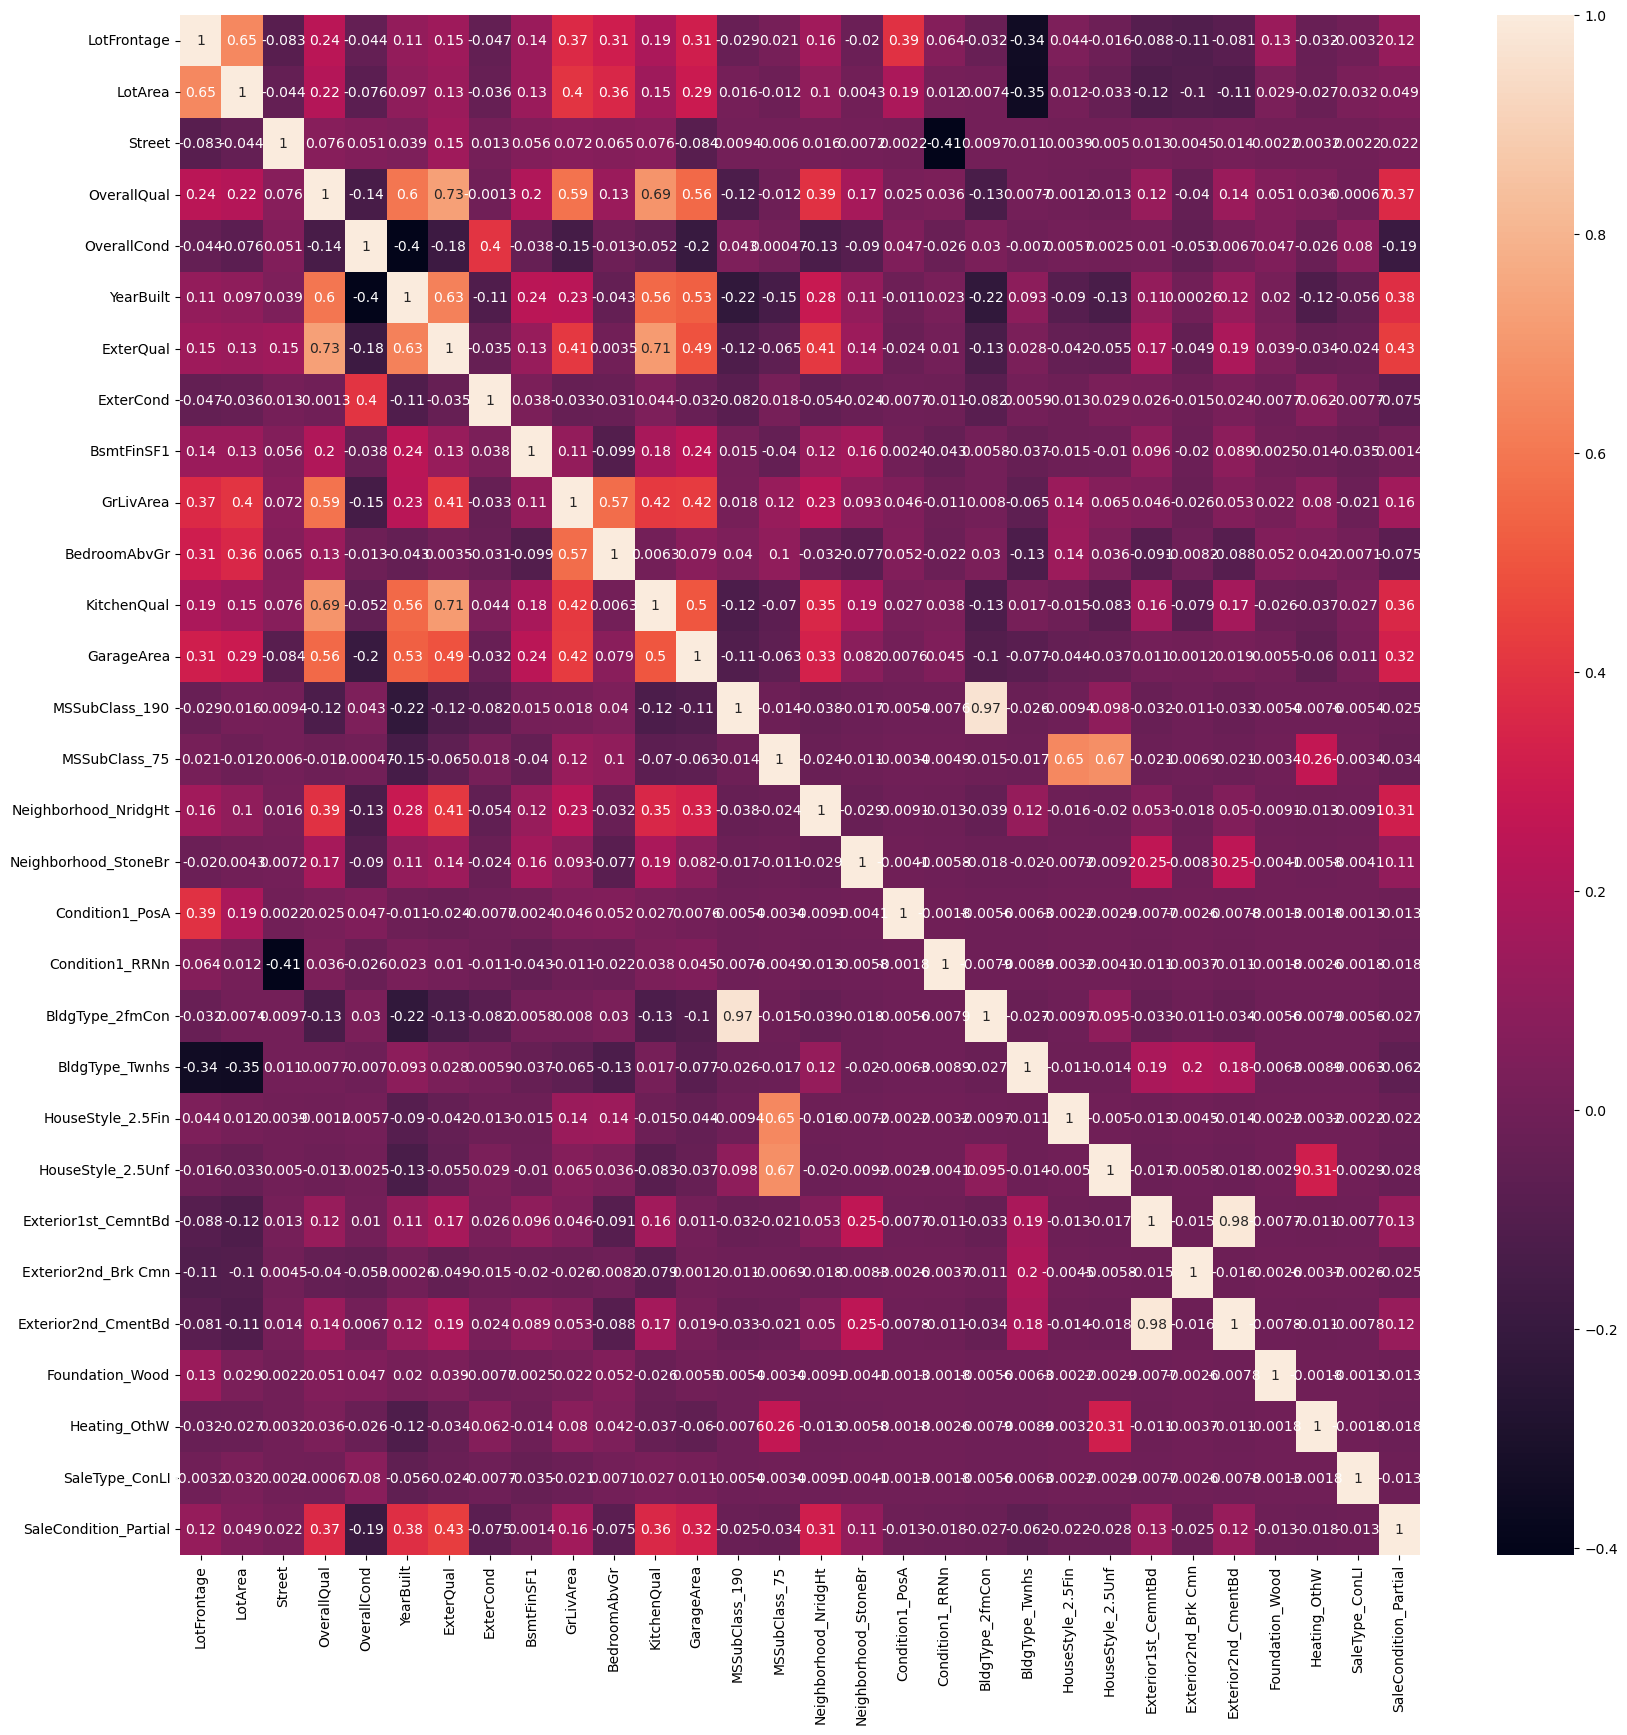

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train[col].corr(),annot=True)

We see the following high correlation pairs:

1.Exterior2nd_CmentBd - Exterior1st_CmentBd (0.98)  
We shall remove Exterior2nd_CmentBd

In [66]:
# All utilities seem to have only one value: AllPub. hence we see we can remove Utilites
for i in ['Exterior2nd_CmentBd']:
    col.remove(i)
X_train = df_train[col]
X_test = df_test[col]

In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by = 'VIF',ascending=False)
print(vif)

                 Features    VIF
2                  Street  70.00
3             OverallQual  48.62
7               ExterCond  41.27
5               YearBuilt  28.65
10           BedroomAbvGr  25.38
6               ExterQual  21.71
9               GrLivArea  19.77
13         MSSubClass_190  18.61
4             OverallCond  18.51
19        BldgType_2fmCon  18.50
11            KitchenQual  15.21
0             LotFrontage  13.64
1                 LotArea  12.45
12             GarageArea  10.20
14          MSSubClass_75   9.55
22      HouseStyle_2.5Unf   5.39
21      HouseStyle_2.5Fin   5.17
8              BsmtFinSF1   2.40
28  SaleCondition_Partial   1.58
15   Neighborhood_NridgHt   1.47
20         BldgType_Twnhs   1.41
17        Condition1_PosA   1.27
23    Exterior1st_CemntBd   1.23
26           Heating_OthW   1.20
16   Neighborhood_StoneBr   1.18
18        Condition1_RRNn   1.07
24    Exterior2nd_Brk Cmn   1.07
25        Foundation_Wood   1.06
27         SaleType_ConLI   1.02


# Model Building

### 1. Simple Linear Regression: Baseline

In [68]:
lm = LinearRegression()
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8876344181122844
0.8679642530644697


#### RESIDUE ANALYSIS
#### EVALUATION ON TRAINING SET

In [69]:
res = y_train-y_train_pred

C:\Users\yadav_erlkrsl\AppData\Local\Temp\ipykernel_19280\4287726284.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 0, 'residue')

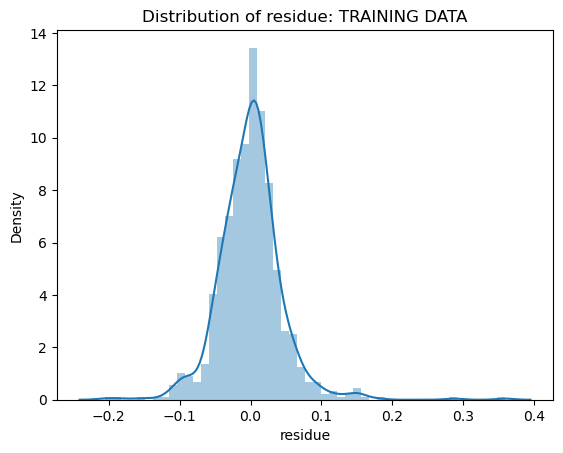

In [70]:
sns.distplot(res)
plt.title('Distribution of residue: TRAINING DATA')
plt.xlabel('residue')

Text(0.5, 1.0, 'Q-Q Plot of residue distribution in TRAINING DATA')

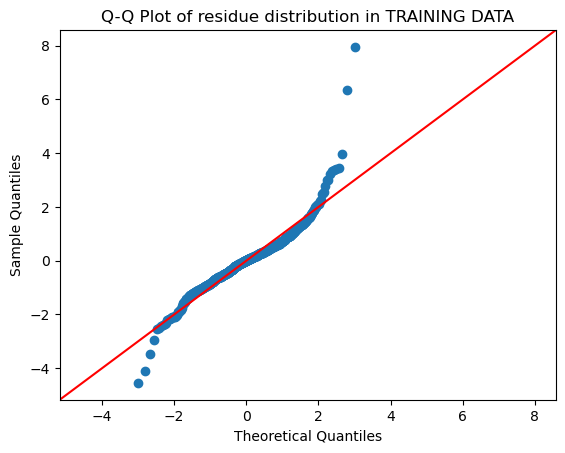

In [71]:
sm.qqplot(res,line='45',fit=True,dist=stats.norm);
plt.title('Q-Q Plot of residue distribution in TRAINING DATA')

Text(0.5, 1.0, 'Y vs residue: TRAINING DATA')

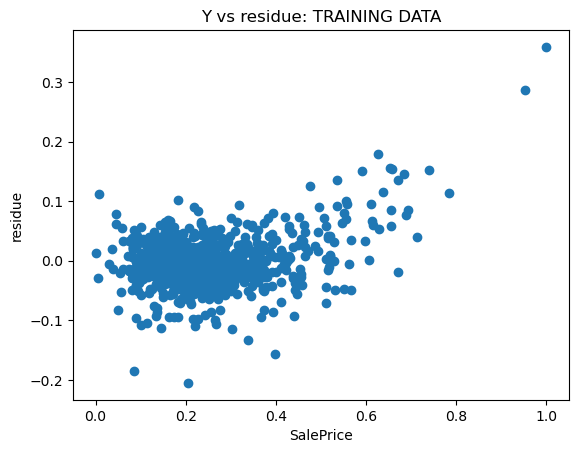

In [72]:
plt.scatter(y_train,res)
plt.xlabel('SalePrice')
plt.ylabel('residue')
plt.title('Y vs residue: TRAINING DATA')

#### EVALUATION ON TEST SET

C:\Users\yadav_erlkrsl\AppData\Local\Temp\ipykernel_19280\1015940491.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res);


Text(0.5, 0, 'residue')

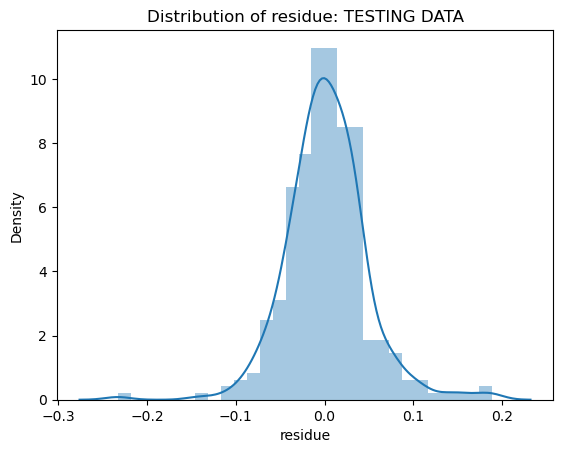

In [74]:
res = y_test-y_test_pred
sns.distplot(res);
plt.title('Distribution of residue: TESTING DATA')
plt.xlabel('residue')

Text(0.5, 1.0, 'Q-Q Plot of residue distribution in TESTING DATA')

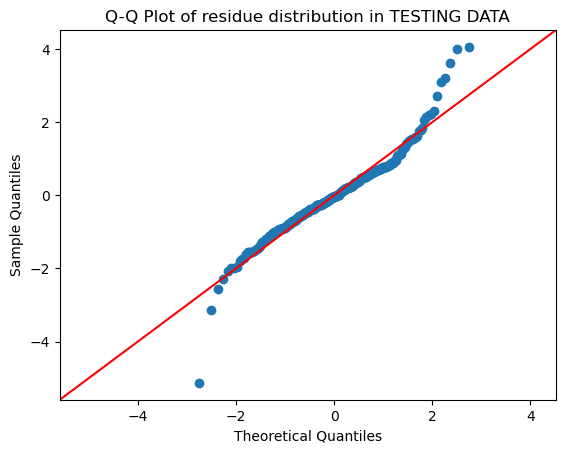

In [75]:
sm.qqplot(res,line='45',fit=True,dist=stats.norm);
plt.title('Q-Q Plot of residue distribution in TESTING DATA')

Text(0.5, 1.0, 'Y vs residue: TESTING DATA')

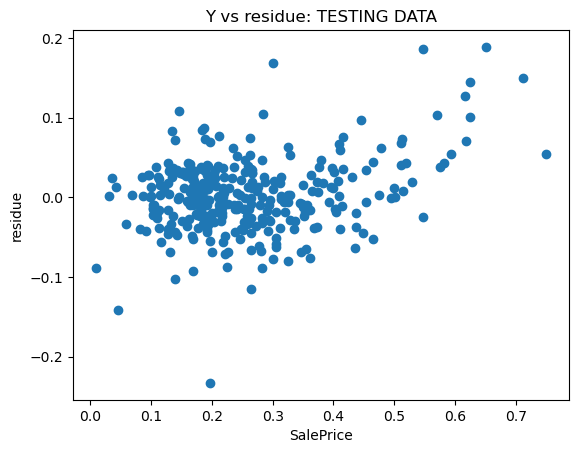

In [76]:
plt.scatter(y_test,res)
plt.xlabel('SalePrice')
plt.ylabel('residue')
plt.title('Y vs residue: TESTING DATA')

In [77]:
print("R-squared for training = ",r2_score(y_train,y_train_pred))
print("R-squared for testing = ",r2_score(y_test,y_test_pred))

R-squared for training =  0.8876344181122844
R-squared for testing =  0.8679642530644697


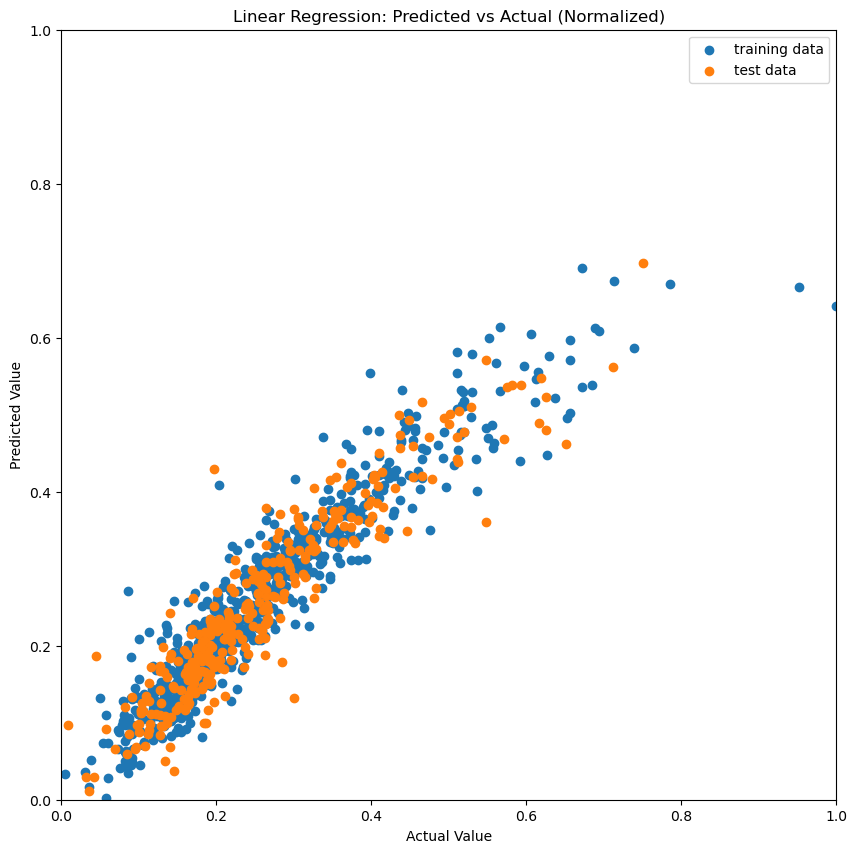

In [78]:
plt.figure(figsize=(10,10))
plt.scatter(y_train,y_train_pred,label = 'training data')
plt.scatter(y_test,y_test_pred,label = 'test data')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Linear Regression: Predicted vs Actual (Normalized)')
plt.legend()

### 2. LASSO

In [79]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))


0.8649427037076529
0.8638567841076642


In [80]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[1e-6,1e-5,1e-4, 1e-3, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.005300      0.004633         0.000595        0.001476     0.000001   
1       0.008455      0.006779         0.005937        0.006422     0.000010   
2       0.006579      0.007445         0.003128        0.006256     0.000100   
3       0.006249      0.007653         0.004686        0.007159     0.001000   
4       0.010418      0.005936         0.005302        0.005513     0.010000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-06}          -0.037557          -0.028216          -0.037768   
1   {'alpha': 1e-05}          -0.037408          -0.028169          -0.037849   
2  {'alpha': 0.0001}          -0.037002          -0.027866          -0.037868   
3   {'alpha': 0.001}          -0.034446          -0.029144          -0.039994   
4    {'alpha': 0.01}          -0.054735          -0.071638          -0.062013   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0          -0.038591  ...           -0.030607           -0.030291   
1          -0.038830  ...           -0.030689           -0.030369   
2          -0.040020  ...           -0.031378           -0.030973   
3          -0.042859  ...           -0.033466           -0.032907   
4          -0.081126  ...           -0.066671           -0.066790   

   split4_train_score  split5_train_score  split6_train_score  \
0           -0.032108           -0.031271           -0.031355   
1           -0.032146           -0.031326           -0.031430   
2           -0.032673           -0.031958           -0.031925   
3           -0.034080           -0.033744           -0.033770   
4           -0.066180           -0.066712           -0.066497   

   split7_train_score  split8_train_score  split9_train_score  \
0           -0.030907           -0.030790           -0.032188   
1           -0.030971           -0.030859           -0.032272   
2           -0.031485           -0.031409           -0.032898   
3           -0.033477           -0.033169           -0.034767   
4           -0.066986           -0.065441           -0.066597   

   mean_train_score  std_train_score  
0         -0.031246         0.000610  
1         -0.031317         0.000605  
2         -0.031908         0.000588  
3         -0.033770         0.000532  
4         -0.066637         0.000519  

[5 rows x 31 columns]

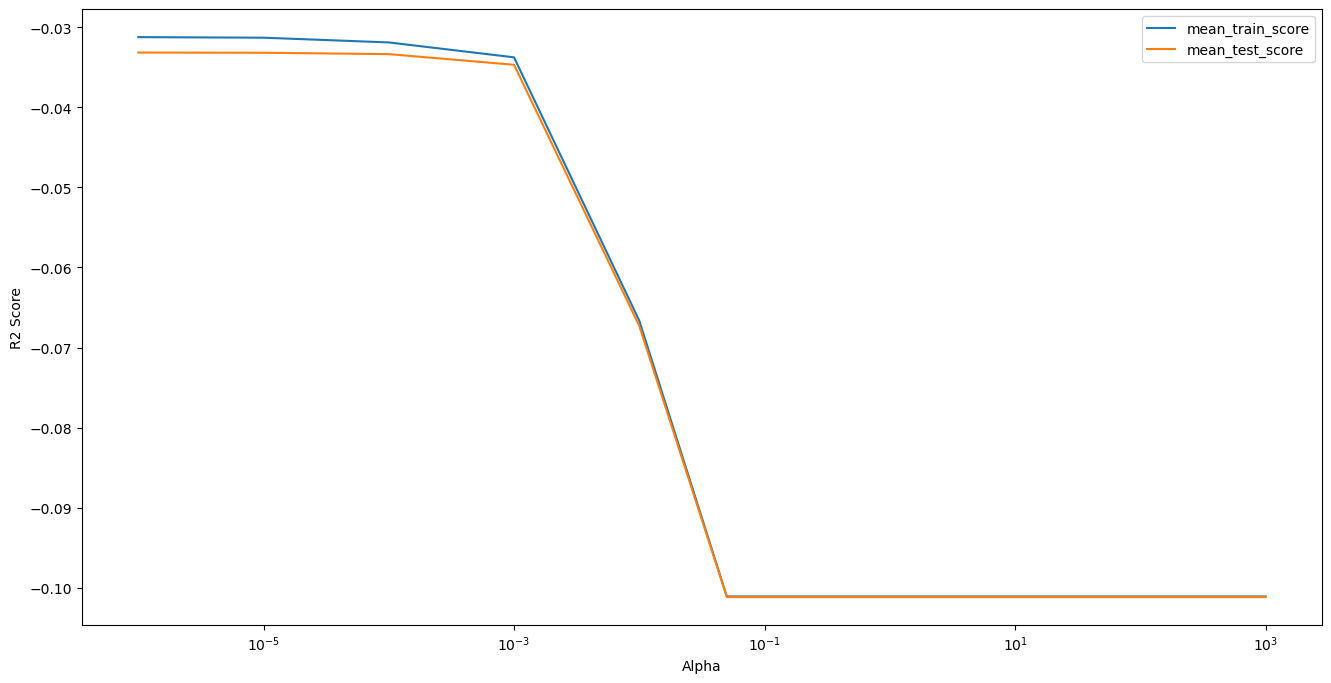

In [82]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'],label = 'mean_train_score')
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'],label = 'mean_test_score')
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [83]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1e-06}

In [84]:
lasso = Lasso(alpha=model_cv.best_params_['alpha'])
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8876334184834241
0.8684882056493365


In [85]:
model_param = list(lasso.coef_)
model_param.append(lasso.intercept_)
cols = list(X_train.columns)
cols.append('constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [86]:
lasso_coef.sort_values(by='Coef',ascending=False).head(60)

Featuere      Coef
9               GrLivArea  0.305524
3             OverallQual  0.202625
1                 LotArea  0.102024
5               YearBuilt  0.081306
18        Condition1_RRNn  0.081166
14          MSSubClass_75  0.080719
8              BsmtFinSF1  0.078933
0             LotFrontage  0.074415
4             OverallCond  0.073917
15   Neighborhood_NridgHt  0.060363
6               ExterQual  0.058323
16   Neighborhood_StoneBr  0.056580
12             GarageArea  0.051609
2                  Street  0.048775
24    Exterior2nd_Brk Cmn  0.046849
19        BldgType_2fmCon  0.042632
11            KitchenQual  0.042056
28  SaleCondition_Partial  0.041704
23    Exterior1st_CemntBd  0.040685
20         BldgType_Twnhs -0.045950
7               ExterCond -0.046204
10           BedroomAbvGr -0.064262
27         SaleType_ConLI -0.066508
13         MSSubClass_190 -0.067396
26           Heating_OthW -0.070504
17        Condition1_PosA -0.084969
22      HouseStyle_2.5Unf -0.091077
25        Foundation_Wood -0.136998
21      HouseStyle_2.5Fin -0.145939
29               constant -0.206376

#### RESIDUE ANALYSIS¶

#### EVALUATION ON TRAINING SET

In [87]:
res = y_train-y_train_pred

C:\Users\yadav_erlkrsl\AppData\Local\Temp\ipykernel_19280\4287726284.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 0, 'residue')

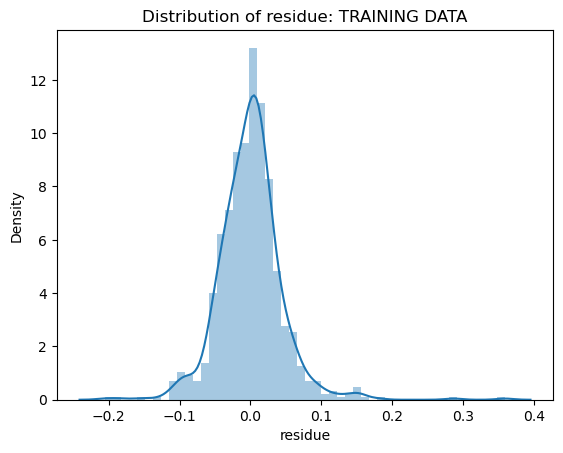

In [88]:
sns.distplot(res)
plt.title('Distribution of residue: TRAINING DATA')
plt.xlabel('residue')

Text(0.5, 1.0, 'Q-Q Plot of residue distribution in TRAINING DATA')

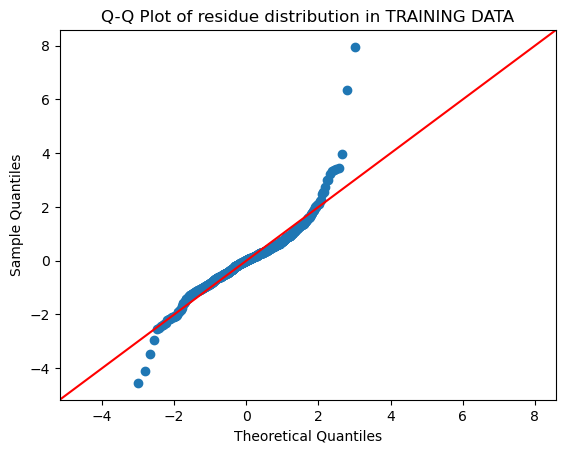

In [89]:
sm.qqplot(res,line='45',fit=True,dist=stats.norm);
plt.title('Q-Q Plot of residue distribution in TRAINING DATA')

Text(0.5, 1.0, 'Y vs residue: TRAINING DATA')

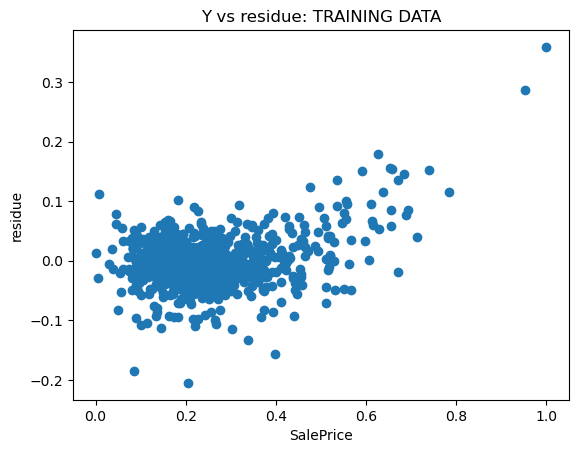

In [90]:
plt.scatter(y_train,res)
plt.xlabel('SalePrice')
plt.ylabel('residue')
plt.title('Y vs residue: TRAINING DATA')

#### EVALUATION ON TEST SET`

C:\Users\yadav_erlkrsl\AppData\Local\Temp\ipykernel_19280\1015940491.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res);


Text(0.5, 0, 'residue')

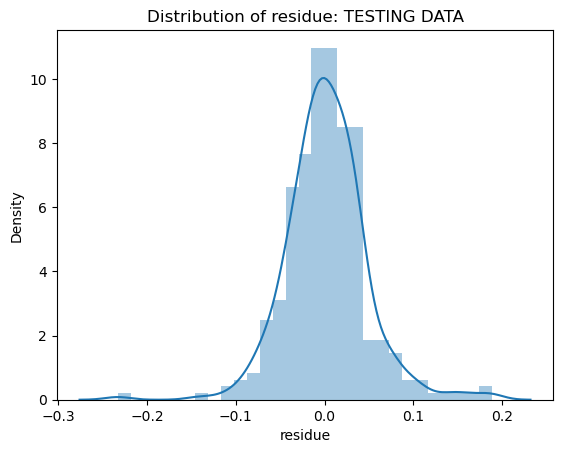

In [91]:
res = y_test-y_test_pred
sns.distplot(res);
plt.title('Distribution of residue: TESTING DATA')
plt.xlabel('residue')

Text(0.5, 1.0, 'Q-Q Plot of residue distribution in TESTING DATA')

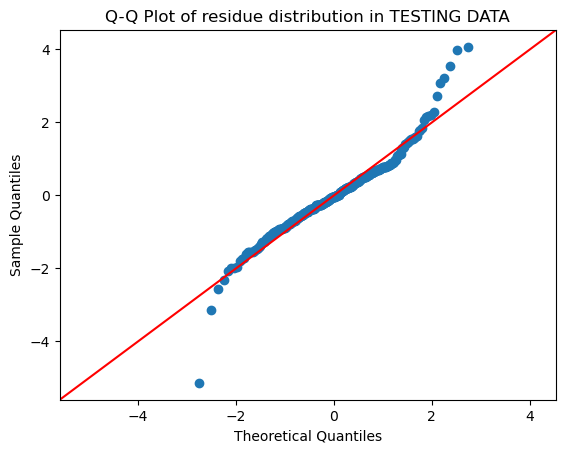

In [92]:
sm.qqplot(res,line='45',fit=True,dist=stats.norm);
plt.title('Q-Q Plot of residue distribution in TESTING DATA')

Text(0.5, 1.0, 'Y vs residue: TESTING DATA')

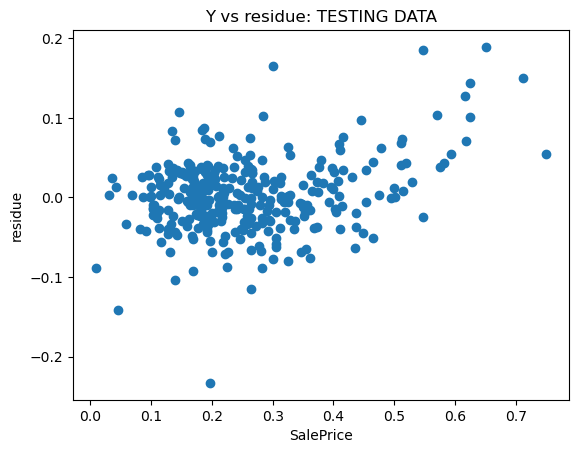

In [93]:
plt.scatter(y_test,res)
plt.xlabel('SalePrice')
plt.ylabel('residue')
plt.title('Y vs residue: TESTING DATA')

In [94]:
print("R-squared for training = ",r2_score(y_train,y_train_pred))
print("R-squared for testing = ",r2_score(y_test,y_test_pred))

R-squared for training =  0.8876334184834241
R-squared for testing =  0.8684882056493365


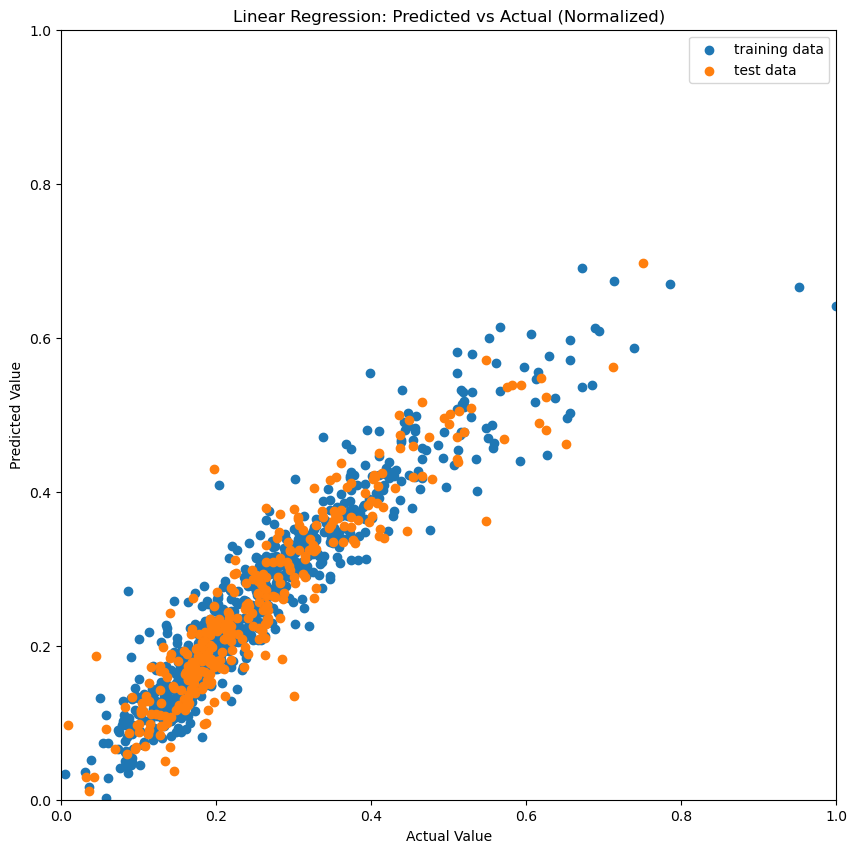

In [95]:
plt.figure(figsize=(10,10))
plt.scatter(y_train,y_train_pred,label = 'training data')
plt.scatter(y_test,y_test_pred,label = 'test data')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Linear Regression: Predicted vs Actual (Normalized)')
plt.legend()

### 3. Ridge

In [96]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8876344020324534
0.8680308711694356


In [97]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [98]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.007385      0.004613         0.006753        0.004465       0.0001   
1       0.003339      0.003942         0.004147        0.005509       0.0010   
2       0.002413      0.005081         0.010936        0.007159       0.0100   
3       0.006503      0.006045         0.004010        0.004067       0.0500   
4       0.005393      0.004271         0.006636        0.004694       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.037573          -0.028221          -0.037759   
1   {'alpha': 0.001}          -0.037572          -0.028221          -0.037760   
2    {'alpha': 0.01}          -0.037555          -0.028215          -0.037772   
3    {'alpha': 0.05}          -0.037481          -0.028191          -0.037814   
4     {'alpha': 0.1}          -0.037392          -0.028161          -0.037853   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0          -0.038565  ...           -0.030599           -0.030282   
1          -0.038568  ...           -0.030600           -0.030283   
2          -0.038595  ...           -0.030609           -0.030291   
3          -0.038698  ...           -0.030647           -0.030323   
4          -0.038801  ...           -0.030687           -0.030355   

   split4_train_score  split5_train_score  split6_train_score  \
0           -0.032104           -0.031265           -0.031348   
1           -0.032104           -0.031266           -0.031349   
2           -0.032107           -0.031273           -0.031355   
3           -0.032117           -0.031298           -0.031386   
4           -0.032130           -0.031328           -0.031420   

   split7_train_score  split8_train_score  split9_train_score  \
0           -0.030900           -0.030783           -0.032179   
1           -0.030901           -0.030784           -0.032180   
2           -0.030909           -0.030791           -0.032190   
3           -0.030936           -0.030820           -0.032230   
4           -0.030962           -0.030848           -0.032269   

   mean_train_score  std_train_score  
0         -0.031238         0.000611  
1         -0.031239         0.000611  
2         -0.031247         0.000610  
3         -0.031277         0.000607  
4         -0.031309         0.000605  

[5 rows x 31 columns]

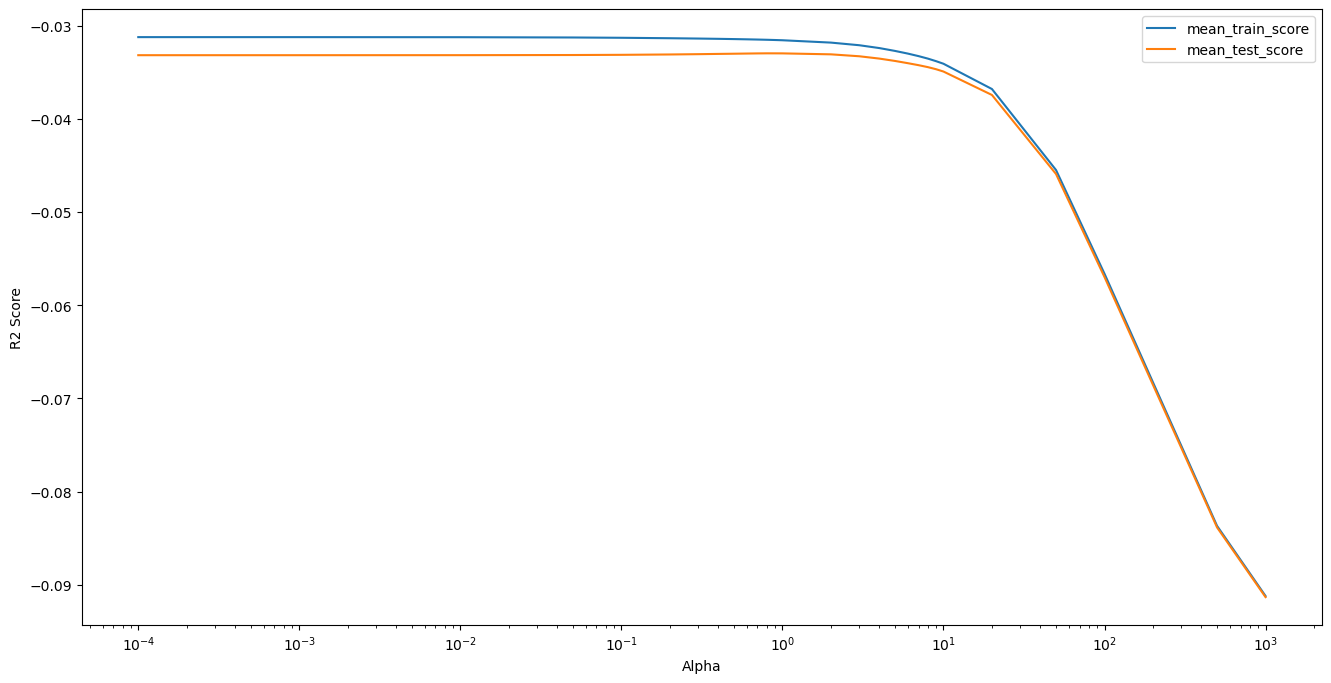

In [99]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'],label = 'mean_train_score')
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'],label = 'mean_test_score')
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [100]:
# Checking the best parameter(Alpha value)
model_cv.best_params_


{'alpha': 0.8}

In [101]:
ridge = Ridge(alpha = model_cv.best_params_['alpha'])
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8858585652257134
0.8798419504237609


In [102]:
model_parameter = list(ridge.coef_)
model_parameter.append(ridge.intercept_)
cols = list(X_train.columns)
cols.append('constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [103]:
ridge_coef.sort_values(by='Coef',ascending=False).head(60)

Feature      Coef
9               GrLivArea  0.280954
3             OverallQual  0.191682
1                 LotArea  0.101704
8              BsmtFinSF1  0.079677
5               YearBuilt  0.077969
6               ExterQual  0.064418
4             OverallCond  0.062617
15   Neighborhood_NridgHt  0.061336
12             GarageArea  0.058270
16   Neighborhood_StoneBr  0.054072
0             LotFrontage  0.053295
18        Condition1_RRNn  0.052525
11            KitchenQual  0.050118
28  SaleCondition_Partial  0.041921
23    Exterior1st_CemntBd  0.040405
24    Exterior2nd_Brk Cmn  0.036998
2                  Street  0.030696
19        BldgType_2fmCon  0.007728
14          MSSubClass_75  0.002337
22      HouseStyle_2.5Unf -0.026318
13         MSSubClass_190 -0.033453
17        Condition1_PosA -0.035382
7               ExterCond -0.035952
27         SaleType_ConLI -0.037637
26           Heating_OthW -0.042833
10           BedroomAbvGr -0.044354
20         BldgType_Twnhs -0.045702
21      HouseStyle_2.5Fin -0.049327
25        Foundation_Wood -0.070902
29               constant -0.185165

#### RESIDUE ANALYSIS
#### EVALUATION ON TRAINING SET

C:\Users\yadav_erlkrsl\AppData\Local\Temp\ipykernel_19280\2653735475.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 0, 'residue')

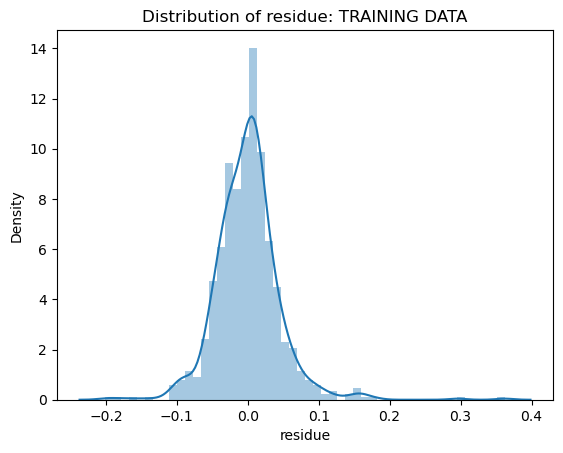

In [104]:
res = y_train-y_train_pred
sns.distplot(res)
plt.title('Distribution of residue: TRAINING DATA')
plt.xlabel('residue')

Text(0.5, 1.0, 'Q-Q Plot of residue distribution in TRAINING DATA')

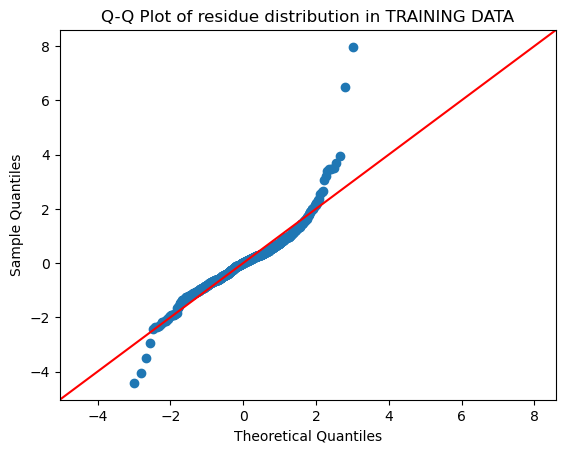

In [105]:
sm.qqplot(res,line='45',fit=True,dist=stats.norm);
plt.title('Q-Q Plot of residue distribution in TRAINING DATA')

Text(0.5, 1.0, 'Y vs residue: TRAINING DATA')

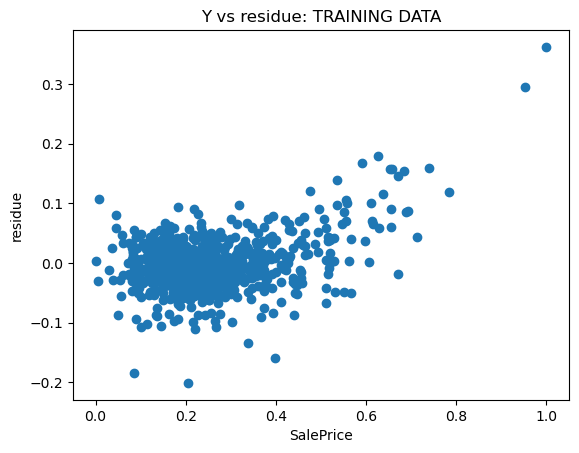

In [106]:
plt.scatter(y_train,res)
plt.xlabel('SalePrice')
plt.ylabel('residue')
plt.title('Y vs residue: TRAINING DATA')

#### EVALUATION ON TEST SET

C:\Users\yadav_erlkrsl\AppData\Local\Temp\ipykernel_19280\1015940491.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res);


Text(0.5, 0, 'residue')

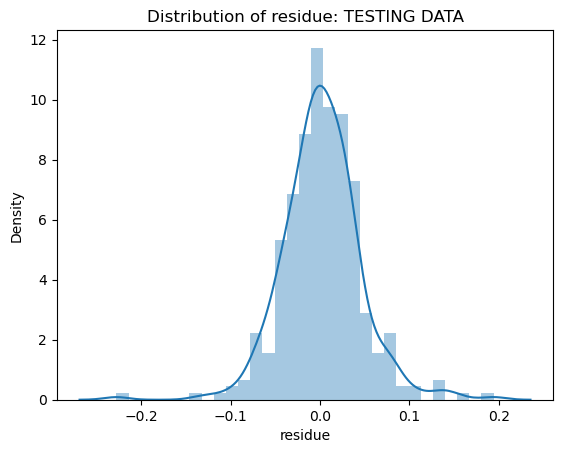

In [107]:
res = y_test-y_test_pred
sns.distplot(res);
plt.title('Distribution of residue: TESTING DATA')
plt.xlabel('residue')

Text(0.5, 1.0, 'Q-Q Plot of residue distribution in TESTING DATA')

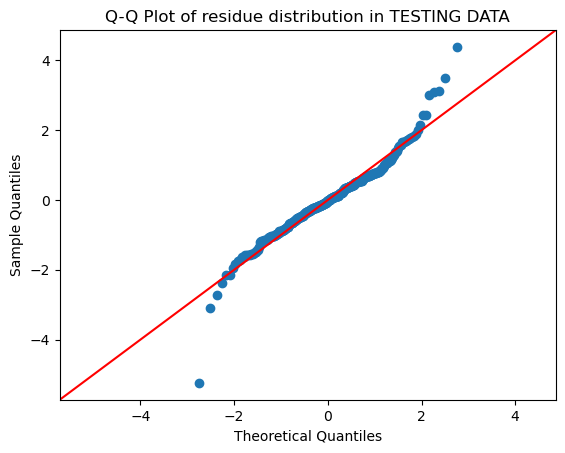

In [108]:
sm.qqplot(res,line='45',fit=True,dist=stats.norm);
plt.title('Q-Q Plot of residue distribution in TESTING DATA')

Text(0.5, 1.0, 'Y vs residue: TESTING DATA')

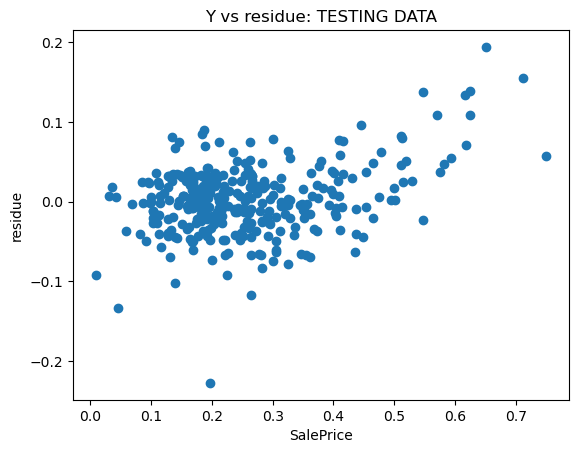

In [109]:
plt.scatter(y_test,res)
plt.xlabel('SalePrice')
plt.ylabel('residue')
plt.title('Y vs residue: TESTING DATA')

In [110]:
print("R-squared for training = ",r2_score(y_train,y_train_pred))
print("R-squared for testing = ",r2_score(y_test,y_test_pred))

R-squared for training =  0.8858585652257134
R-squared for testing =  0.8798419504237609


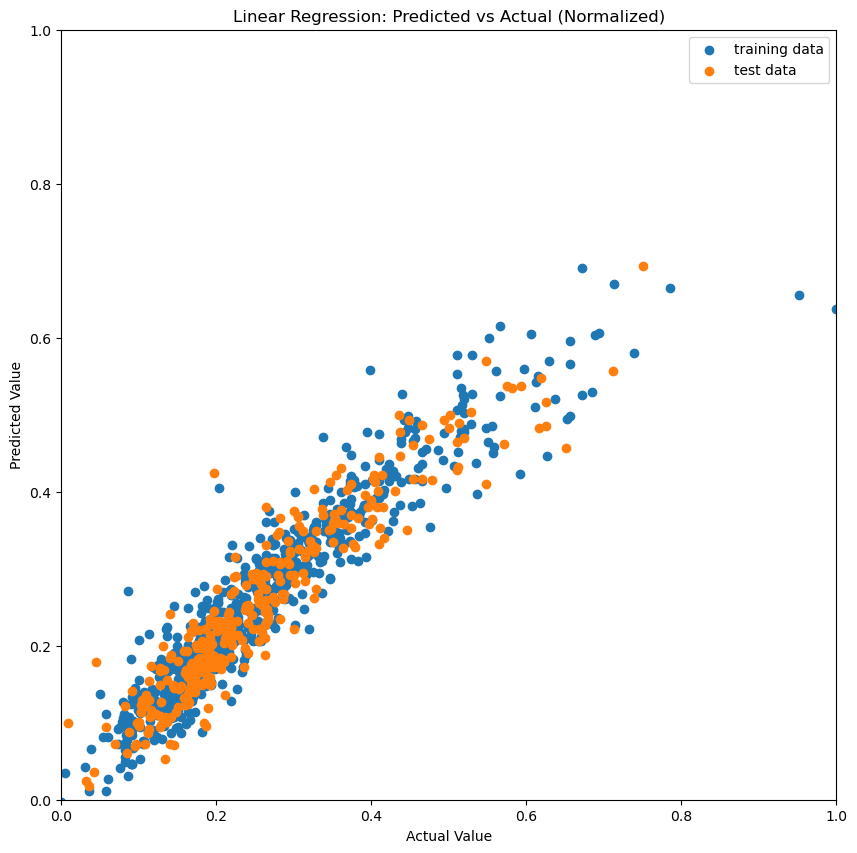

In [111]:
plt.figure(figsize=(10,10))
plt.scatter(y_train,y_train_pred,label = 'training data')
plt.scatter(y_test,y_test_pred,label = 'test data')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Linear Regression: Predicted vs Actual (Normalized)')
plt.legend()

## Let us look back at the assumptions of Linear Regression

1. **Linearity:** The High R-squared values validate Linearity
2. **Normality:** The Q-Q plots validate Normality
3. **Independence:** Low VIF values validate Independence
4. **Homoscedasticity:** The residue vs 'SalePrice' plots validate Homoscedasticty

### Hence all our models can be accepted

## Which model to pick?
- Simple:
    - Training $R^2 =$ 0.892357917249122
    - Testing $R^2 =$ 0.8740158059391069


- Lasso ($\lambda = 1e-6$)
    - Training $R^2 =$ 0.8923571291216799
    - Testing $R^2 =$ 0.8744220531193507


- Ridge ($\lambda = 2$)
    - Training $R^2 =$ 0.8897302013515009
    - Testing $R^2 =$ 0.8820836858709308


All the 3 models have 29 variables. Even Lasso didn't have any zero coefficients.

Thus, we choose, Ridge regression, which shows the highest Test data $R^2$


### FINAL MODEL

In [112]:
ridge = Ridge(alpha = 2)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8827078423882275
0.8791220775605105


In [113]:
model_parameter = list(ridge.coef_)
model_parameter.append(ridge.intercept_)
cols = list(X_train.columns)
cols.append('constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [114]:
ridge_coef.sort_values(by='Coef',ascending=False).head(60)

Feature      Coef
9               GrLivArea  0.254604
3             OverallQual  0.179817
1                 LotArea  0.097633
8              BsmtFinSF1  0.080724
5               YearBuilt  0.074260
6               ExterQual  0.070784
12             GarageArea  0.063839
15   Neighborhood_NridgHt  0.061612
11            KitchenQual  0.058429
4             OverallCond  0.051745
16   Neighborhood_StoneBr  0.050787
0             LotFrontage  0.046184
28  SaleCondition_Partial  0.042263
23    Exterior1st_CemntBd  0.039728
18        Condition1_RRNn  0.034084
24    Exterior2nd_Brk Cmn  0.027713
2                  Street  0.019891
19        BldgType_2fmCon -0.002282
14          MSSubClass_75 -0.008480
22      HouseStyle_2.5Unf -0.015648
17        Condition1_PosA -0.016888
13         MSSubClass_190 -0.021932
27         SaleType_ConLI -0.022711
10           BedroomAbvGr -0.023315
7               ExterCond -0.026619
26           Heating_OthW -0.027601
21      HouseStyle_2.5Fin -0.028190
25        Foundation_Wood -0.040341
20         BldgType_Twnhs -0.043578
29               constant -0.171087

**Conclusions**  
The most important features to determine the price of a property are:  
The overall material and finish of the house  
First Floor Area  
Second Floor Area  
Basement Area  

# Excluding the top 5 predictors  
Here are the top 5 predictors of our final model  
1. OverallQual  
2. 1stFlrSF  
3. 2ndFlrSF  
4. BsmtFinSF1  
5. YearBuilt  

To remove them and redo the whole thing, we need to restart from RFE by removing these columns from consideration

### RFE  
Let us use use RFE to cut down the number of columns to 40, since we have removed the key variables.  
We shall perform RFE over simple linear regression, since we do not know the optimal regularization constants for lasso and ridge yet.

In [115]:
X_train = df_train.drop(['SalePrice','OverallQual','1stFlrSF','2ndFlrSF','BsmtFinSF1','YearBuilt'],axis=1)
y_train = df_train.SalePrice
X_test = df_test.drop(['SalePrice','OverallQual','1stFlrSF','2ndFlrSF','BsmtFinSF1','YearBuilt'],axis=1)
y_test = df_test.SalePrice

In [116]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=40)
rfe = rfe.fit(X_train,y_train)

In [117]:
col = list(X_train.columns[rfe.support_])

In [118]:
X_train = df_train[col]
X_test = df_test[col]

In [119]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by = 'VIF',ascending=False)
print(vif)

                Features     VIF
29       BldgType_Duplex     inf
35    Exterior1st_CBlock     inf
21         MSSubClass_90     inf
36    Exterior2nd_CBlock     inf
27       Condition2_Norm  856.48
12         MSSubClass_20   59.39
17         MSSubClass_60   37.40
15         MSSubClass_45   30.37
16         MSSubClass_50   25.53
32     HouseStyle_1.5Unf   22.70
31       BldgType_TwnhsE   18.40
13         MSSubClass_30   15.03
10            GarageCond   14.68
38         GarageType_NA   14.02
18         MSSubClass_70   11.17
30        BldgType_Twnhs    8.39
19         MSSubClass_80    8.35
11        MSSubClass_190    6.22
20         MSSubClass_85    5.25
5              GrLivArea    3.97
26      Condition2_Feedr    3.45
7           KitchenAbvGr    3.21
9             GarageArea    2.84
2              ExterQual    2.71
8            KitchenQual    2.45
14         MSSubClass_40    2.18
28       Condition2_RRNn    2.17
3               BsmtQual    2.15
6           BedroomAbvGr    2.09
33     Hou

C:\Users\yadav_erlkrsl\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


<Axes: >

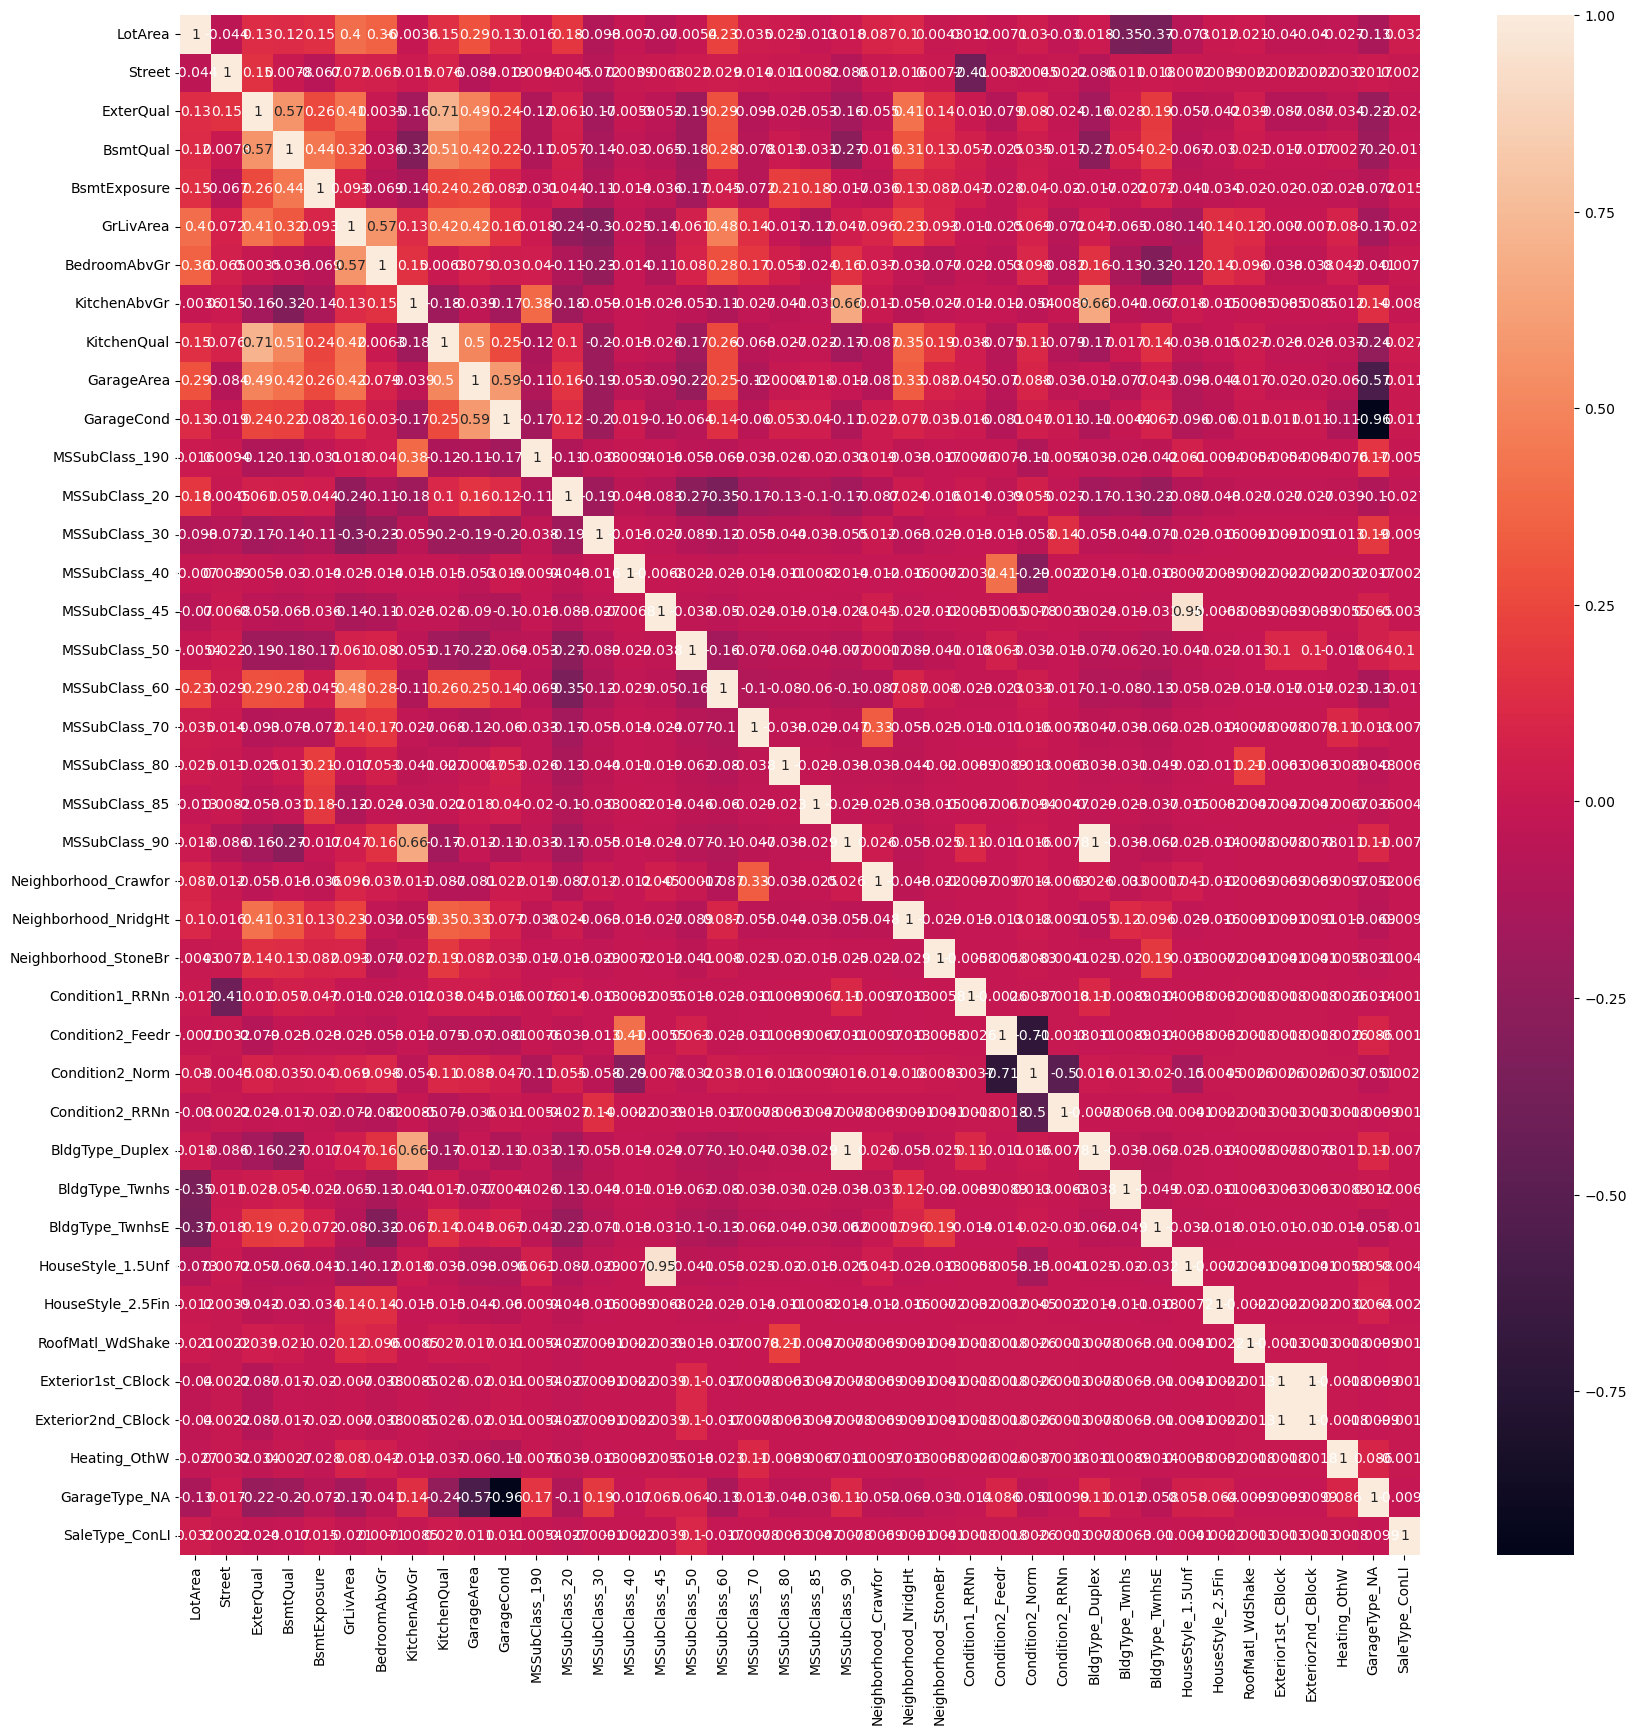

In [120]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train[col].corr(),annot=True)

In [121]:
# Create correlation matrix
corr_matrix = X_train[col].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

# Drop features 
X_train = X_train[col].drop(to_drop, axis=1)

In [122]:
X_test = X_test[X_train.columns]

<Axes: >

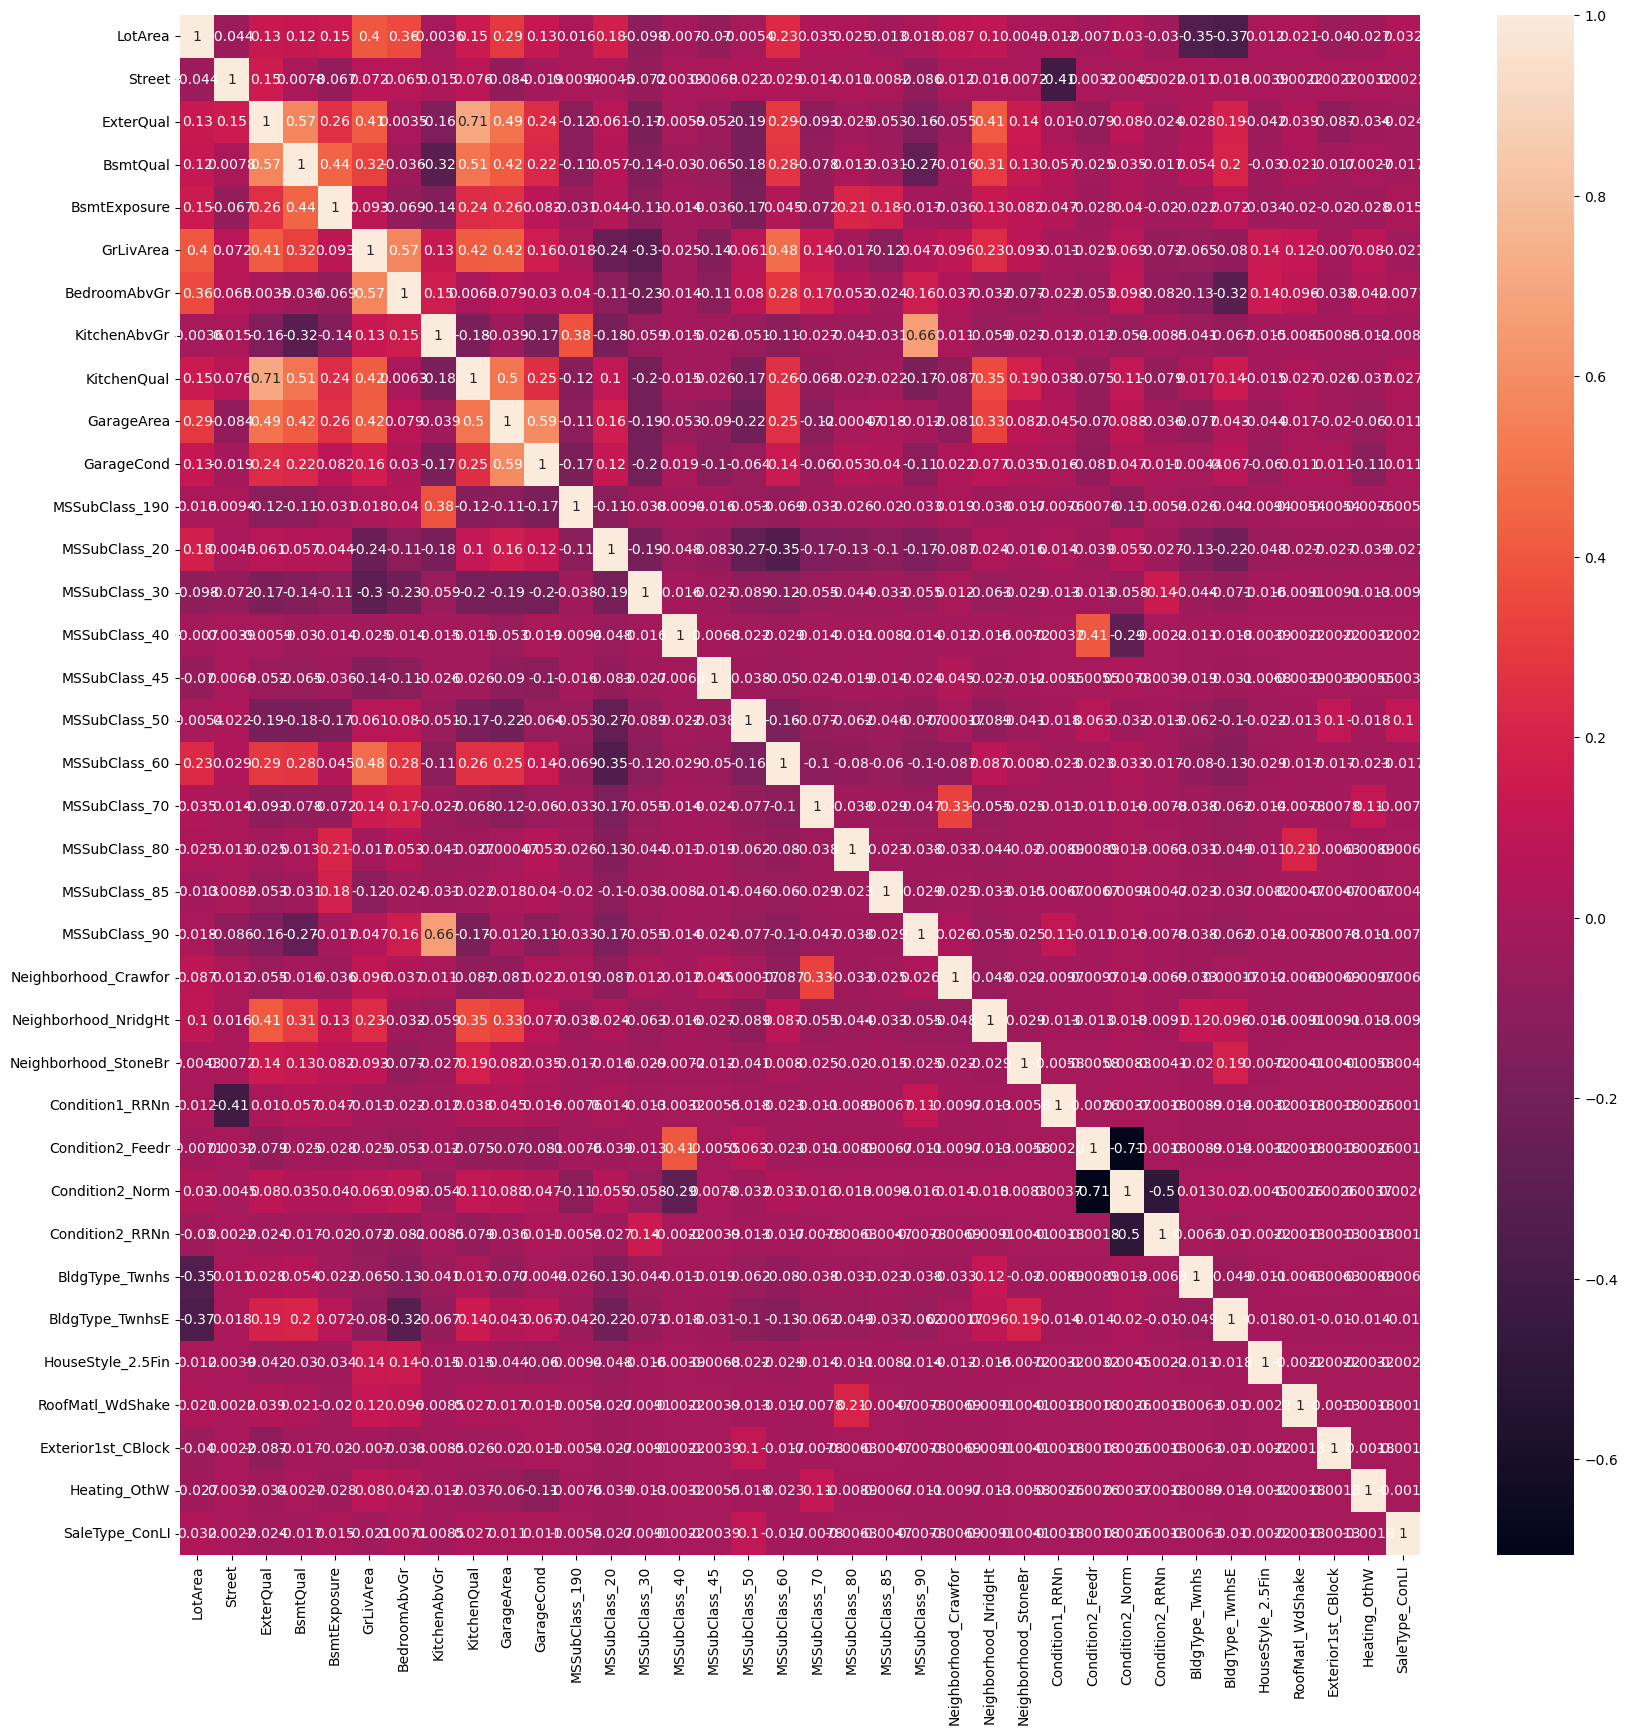

In [123]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),annot=True)

In [124]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif  = vif.sort_values(by = 'VIF',ascending=False)
print(vif)

                Features     VIF
27       Condition2_Norm  370.52
1                 Street  277.16
12         MSSubClass_20   73.96
7           KitchenAbvGr   51.78
17         MSSubClass_60   35.68
3               BsmtQual   30.78
6           BedroomAbvGr   27.84
5              GrLivArea   26.35
10            GarageCond   23.92
16         MSSubClass_50   22.55
2              ExterQual   18.52
30       BldgType_TwnhsE   15.81
9             GarageArea   15.06
8            KitchenQual   14.27
13         MSSubClass_30   12.51
0                LotArea   11.40
21         MSSubClass_90   10.25
18         MSSubClass_70    9.45
19         MSSubClass_80    7.04
29        BldgType_Twnhs    6.97
4           BsmtExposure    5.13
11        MSSubClass_190    5.06
20         MSSubClass_85    4.46
15         MSSubClass_45    3.29
26      Condition2_Feedr    2.19
14         MSSubClass_40    1.99
31     HouseStyle_2.5Fin    1.81
28       Condition2_RRNn    1.52
23  Neighborhood_NridgHt    1.44
22  Neighb

### Lasso

In [125]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[1e-6,1e-5,1e-4, 1e-3, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


C:\Users\yadav_erlkrsl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.875e-03, tolerance: 1.290e-03
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [126]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.028899      0.010680         0.003693        0.005073     0.000001   
1       0.012836      0.007655         0.006084        0.006555     0.000010   
2       0.010012      0.005038         0.004911        0.002782     0.000100   
3       0.007735      0.004003         0.002786        0.004886     0.001000   
4       0.006492      0.007015         0.003375        0.006168     0.010000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-06}          -0.036672          -0.038326          -0.039889   
1   {'alpha': 1e-05}          -0.036620          -0.038269          -0.039692   
2  {'alpha': 0.0001}          -0.036915          -0.037904          -0.039240   
3   {'alpha': 0.001}          -0.035330          -0.037289          -0.041824   
4    {'alpha': 0.01}          -0.055555          -0.072060          -0.064187   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0          -0.045453  ...           -0.035927           -0.034919   
1          -0.045450  ...           -0.035993           -0.034984   
2          -0.046498  ...           -0.036699           -0.035647   
3          -0.049325  ...           -0.038423           -0.036969   
4          -0.083847  ...           -0.069106           -0.069009   

   split4_train_score  split5_train_score  split6_train_score  \
0           -0.036394           -0.036174           -0.036420   
1           -0.036468           -0.036211           -0.036513   
2           -0.037119           -0.036992           -0.037067   
3           -0.038290           -0.038378           -0.038271   
4           -0.068559           -0.069133           -0.069538   

   split7_train_score  split8_train_score  split9_train_score  \
0           -0.035879           -0.035666           -0.036624   
1           -0.035934           -0.035704           -0.036669   
2           -0.036659           -0.036272           -0.037238   
3           -0.038207           -0.037459           -0.038586   
4           -0.069683           -0.067469           -0.069583   

   mean_train_score  std_train_score  
0         -0.036059         0.000468  
1         -0.036121         0.000472  
2         -0.036767         0.000462  
3         -0.038138         0.000489  
4         -0.069151         0.000670  

[5 rows x 31 columns]

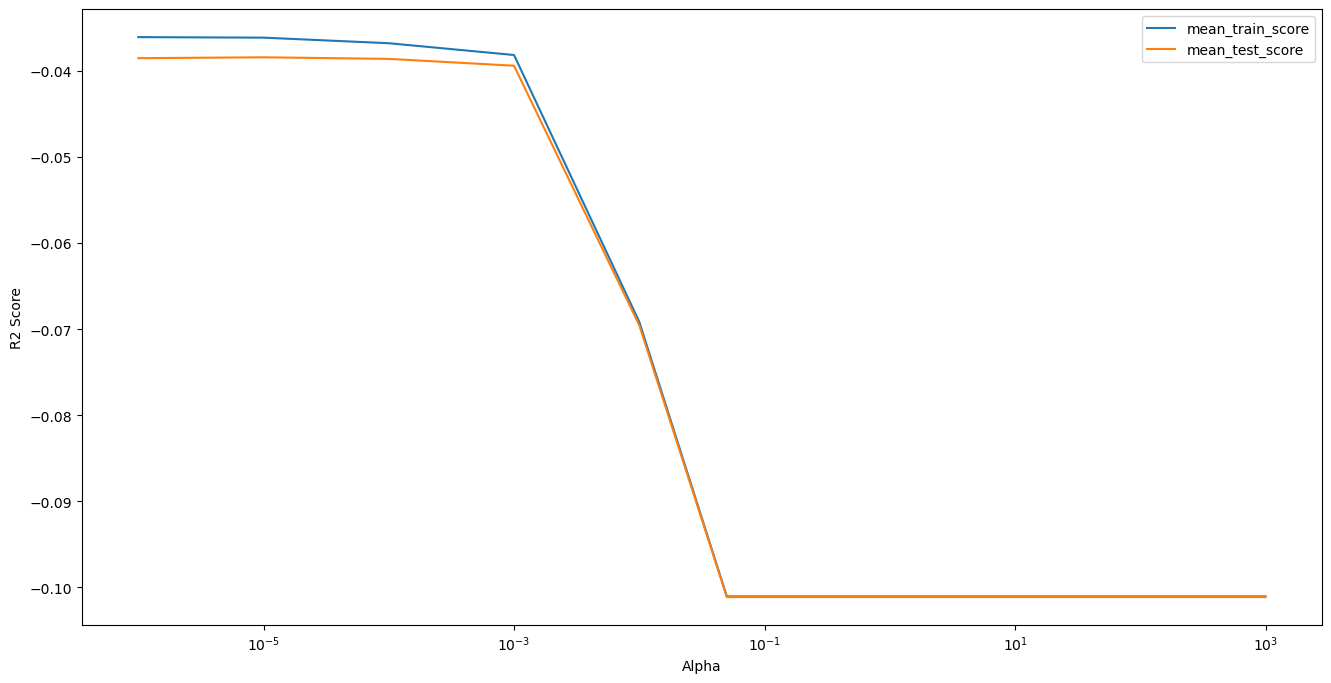

In [127]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'],label = 'mean_train_score')
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'],label = 'mean_test_score')
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [128]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1e-05}

In [129]:
lasso = Lasso(alpha=model_cv.best_params_['alpha'])
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8649954168201553
0.8687183017229242


In [130]:
model_param = list(lasso.coef_)
model_param.append(lasso.intercept_)
cols = list(X_train.columns)
cols.append('constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [131]:
lasso_coef

Featuere      Coef
0                LotArea  0.053462
1                 Street  0.088133
2              ExterQual  0.104246
3               BsmtQual  0.063768
4           BsmtExposure  0.060082
5              GrLivArea  0.409328
6           BedroomAbvGr -0.086199
7           KitchenAbvGr -0.132750
8            KitchenQual  0.080833
9             GarageArea  0.107641
10            GarageCond -0.022019
11        MSSubClass_190  0.000000
12         MSSubClass_20  0.047324
13         MSSubClass_30  0.014847
14         MSSubClass_40 -0.000000
15         MSSubClass_45  0.018060
16         MSSubClass_50 -0.000393
17         MSSubClass_60  0.032487
18         MSSubClass_70 -0.006911
19         MSSubClass_80  0.028643
20         MSSubClass_85  0.026132
21         MSSubClass_90  0.026138
22  Neighborhood_Crawfor  0.066166
23  Neighborhood_NridgHt  0.078553
24  Neighborhood_StoneBr  0.104146
25       Condition1_RRNn  0.060407
26      Condition2_Feedr -0.078528
27       Condition2_Norm -0.059641
28       Condition2_RRNn -0.028004
29        BldgType_Twnhs -0.025089
30       BldgType_TwnhsE  0.014393
31     HouseStyle_2.5Fin -0.070420
32      RoofMatl_WdShake -0.090858
33    Exterior1st_CBlock  0.000000
34          Heating_OthW -0.092500
35        SaleType_ConLI -0.047338
36              constant -0.077849

In [132]:
lasso_coef.sort_values(by='Coef',ascending=False).head(60)

Featuere      Coef
5              GrLivArea  0.409328
9             GarageArea  0.107641
2              ExterQual  0.104246
24  Neighborhood_StoneBr  0.104146
1                 Street  0.088133
8            KitchenQual  0.080833
23  Neighborhood_NridgHt  0.078553
22  Neighborhood_Crawfor  0.066166
3               BsmtQual  0.063768
25       Condition1_RRNn  0.060407
4           BsmtExposure  0.060082
0                LotArea  0.053462
12         MSSubClass_20  0.047324
17         MSSubClass_60  0.032487
19         MSSubClass_80  0.028643
21         MSSubClass_90  0.026138
20         MSSubClass_85  0.026132
15         MSSubClass_45  0.018060
13         MSSubClass_30  0.014847
30       BldgType_TwnhsE  0.014393
11        MSSubClass_190  0.000000
14         MSSubClass_40 -0.000000
33    Exterior1st_CBlock  0.000000
16         MSSubClass_50 -0.000393
18         MSSubClass_70 -0.006911
10            GarageCond -0.022019
29        BldgType_Twnhs -0.025089
28       Condition2_RRNn -0.028004
35        SaleType_ConLI -0.047338
27       Condition2_Norm -0.059641
31     HouseStyle_2.5Fin -0.070420
36              constant -0.077849
26      Condition2_Feedr -0.078528
6           BedroomAbvGr -0.086199
32      RoofMatl_WdShake -0.090858
34          Heating_OthW -0.092500
7           KitchenAbvGr -0.132750

#### Ridge

In [133]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [134]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.005262      0.002803         0.002336        0.002449       0.0001   
1       0.003970      0.004827         0.004926        0.005739       0.0010   
2       0.009216      0.007539         0.003303        0.006618       0.0100   
3       0.009372      0.007652         0.006249        0.007654       0.0500   
4       0.006248      0.007653         0.004687        0.007159       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.036675          -0.038333          -0.039926   
1   {'alpha': 0.001}          -0.036673          -0.038332          -0.039925   
2    {'alpha': 0.01}          -0.036655          -0.038320          -0.039912   
3    {'alpha': 0.05}          -0.036572          -0.038275          -0.039871   
4     {'alpha': 0.1}          -0.036472          -0.038222          -0.039839   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0          -0.045445  ...           -0.035924           -0.034911   
1          -0.045445  ...           -0.035925           -0.034912   
2          -0.045445  ...           -0.035929           -0.034920   
3          -0.045450  ...           -0.035948           -0.034950   
4          -0.045461  ...           -0.035977           -0.034988   

   split4_train_score  split5_train_score  split6_train_score  \
0           -0.036384           -0.036171           -0.036411   
1           -0.036385           -0.036171           -0.036412   
2           -0.036390           -0.036172           -0.036420   
3           -0.036414           -0.036179           -0.036458   
4           -0.036438           -0.036195           -0.036498   

   split7_train_score  split8_train_score  split9_train_score  \
0           -0.035874           -0.035666           -0.036623   
1           -0.035874           -0.035666           -0.036624   
2           -0.035879           -0.035666           -0.036626   
3           -0.035898           -0.035669           -0.036639   
4           -0.035920           -0.035680           -0.036655   

   mean_train_score  std_train_score  
0         -0.036054         0.000468  
1         -0.036054         0.000468  
2         -0.036059         0.000468  
3         -0.036079         0.000468  
4         -0.036104         0.000466  

[5 rows x 31 columns]

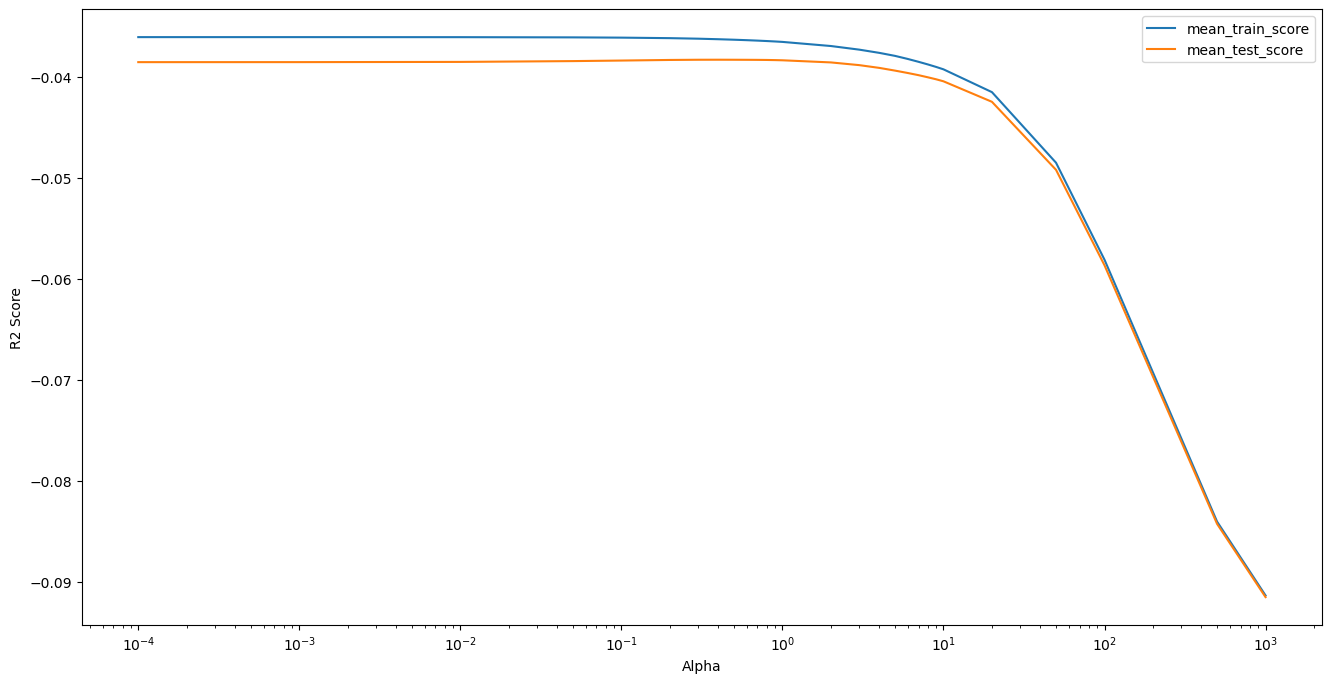

In [135]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'],label = 'mean_train_score')
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'],label = 'mean_test_score')
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('R2 Score')
plt.legend()
plt.show()

In [136]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.4}

In [137]:
ridge = Ridge(alpha = model_cv.best_params_['alpha'])
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.86422462428113
0.8680132003356327


In [139]:
model_parameter = list(ridge.coef_)
model_parameter.append(ridge.intercept_)
cols = list(X_train.columns)
cols.append('constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [140]:
ridge_coef.sort_values(by='Coef',ascending=False).head(60)

Feature      Coef
5              GrLivArea  0.379317
9             GarageArea  0.108476
2              ExterQual  0.106675
24  Neighborhood_StoneBr  0.102862
8            KitchenQual  0.085331
23  Neighborhood_NridgHt  0.079349
1                 Street  0.075874
22  Neighborhood_Crawfor  0.067926
3               BsmtQual  0.066403
4           BsmtExposure  0.061307
0                LotArea  0.058298
25       Condition1_RRNn  0.050234
12         MSSubClass_20  0.047513
17         MSSubClass_60  0.036686
19         MSSubClass_80  0.027872
20         MSSubClass_85  0.024024
21         MSSubClass_90  0.021069
15         MSSubClass_45  0.017497
30       BldgType_TwnhsE  0.016599
13         MSSubClass_30  0.014846
33    Exterior1st_CBlock  0.003358
16         MSSubClass_50  0.002807
11        MSSubClass_190 -0.001599
14         MSSubClass_40 -0.002373
18         MSSubClass_70 -0.003852
28       Condition2_RRNn -0.010009
10            GarageCond -0.019420
29        BldgType_Twnhs -0.022555
27       Condition2_Norm -0.038010
35        SaleType_ConLI -0.043149
26      Condition2_Feedr -0.046693
31     HouseStyle_2.5Fin -0.055687
32      RoofMatl_WdShake -0.062162
6           BedroomAbvGr -0.072305
34          Heating_OthW -0.072546
7           KitchenAbvGr -0.101706
36              constant -0.103363

Thus, after optimizing for lambda and R-squared scored, our final model would be 
**Lasso regularized linear regression with lambda = 1e-4**

We selected this because of the highest R-squared scores and since many coefficients were 0, resulting in feature selection.
- R-squared for training = 0.8574128047960761
- R-squared for testing = 0.8521874181894856
